### AGN Photometry: UV-IR Color Relations & Automation

This research project involves the analysis of 27 Active Galactic Nuclei (AGN) sources with Ultraviolet (UV) data obtained from a pipeline in various filters. The primary objective was to reproduce the pipeline data using the Swift UVOT software and its diverse methods. However, discrepancies between the measured magnitudes and the original pipeline data were observed, indicating potential differences in aperture sizes.

To address this issue, a Curve of Growth model was employed, where magnitudes were measured for various aperture sizes to study how the magnitude changes with aperture radius. The count rates increased with the aperture radius until reaching a plateau, signifying the inclusion of more background and less of the source beyond a certain radius. Comparison of the Curve of Growth model with the pipeline data demonstrated that the pipeline magnitude values were approached with an increase in aperture radius.

The project further involved comparing the UV data with the Infrared (IR) magnitudes obtained from the Two Micron All Sky Survey for all aperture radii. This comparison provided valuable insights into the star formation rates of galaxies. The difference between the UV and IR magnitudes, along with the corresponding color, served as an indicator of star formation rates. 

An ultimate goal of this project was to automate the entire photometry process to streamline data analysis and ensure more consistent and reliable results. Automating the photometry process would enhance efficiency and reproducibility, allowing for larger sample sizes to be analyzed systematically.

#### Background

- Active Galactic Nuclei (AGN) - AGNs are highly luminous regions in galaxies with supermassive black holes, emitting radiation across the electromagnetic spectrum. AGNs play a crucial role in galaxy evolution and are believed to influence the formation and growth of galaxies.
- Ultraviolet (UV) Filters: UVM2, UVW1, and UVW2 are commonly used UV filters in astronomy to study AGNs' high-energy processes.
- Infrared (IR) Filters: JHK filters from 2MASS are used to observe AGNs and galaxies in longer wavelengths, tracing obscured regions and probing star formation.

#### Motivation

- Studying the UV and IR wavelengths emitted by AGNs and galaxies provides crucial insights into their properties and evolution.
- The UV region helps detect young stars and intense AGN activity, while the IR region traces warm dust emission linked to star formation rates.

#### Methodology

1) SWIFT UVOT Software
- Select appropriate aperture radii for photometry and choose background regions for accurate background subtraction.
- Run the uvotsource method for aperture photometry.
2) Curve of Growth Model
- Measure magnitudes for increasing aperture radii.
- Plot count rates against aperture radii to construct the curve of growth model.

#### Import Modules

In [1]:
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import os
import warnings

# Filter out Matplotlib legend-related warnings
warnings.filterwarnings("ignore")

#### Get a List of Obs IDs

In [2]:
directory = os.fsencode('/mnt/home/guptaagr/AGN-Photometry/swift27/')
directories = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename[0]!='0':
        continue
    else:
        directories.append(filename)
directories=sorted(directories)

#### Plot the Curve of Growth Model

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


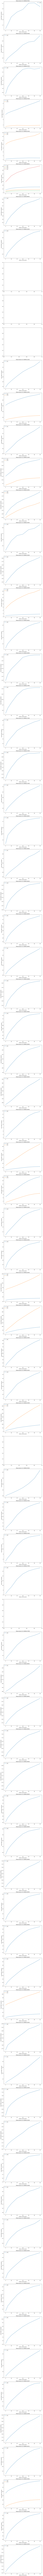

In [3]:
filters = ['uw1', 'uw2', 'um2', 'uuu']
radii = [5.000, 7.000, 10.000, 15.000, 20.000, 25.000, 30.000, 35.000]

# Calculate the number of plots needed based on the number of observation directories
num_plots = len(directories)

# Set up the subplots
fig, axs = plt.subplots(num_plots, 1, figsize=(8, 6*num_plots))

# Iterate over the observation directories
for i, obs_id in enumerate(directories):
    # Iterate over the filters
    for filterr in filters:
        # List comprehension to calculate mean magnitudes for available radii
        mags = [fits.open(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}_noapcorr.fits")[1].data['AP_COI_SRC_RATE'].mean() 
                for radius in radii if os.path.exists(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}_noapcorr.fits")]
        
        # Check if there are any magnitudes available
        if mags:
            # Plot the count rates for the filter and observation ID in the respective subplot
            axs[i].plot(radii, mags, label=f"{filterr}")
            axs[i].set_title(f"Observation ID: {obs_id}")
            axs[i].set_xlabel('Radius (arcseconds)')
            axs[i].set_ylabel('Count Rate (counts/s)')
    
    # Add a legend to each subplot
    axs[i].legend()

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

#### Plot the Curve of Growth Model with Magnitudes

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


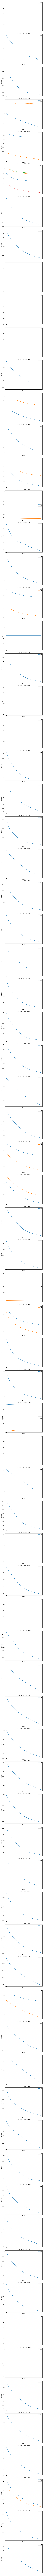

In [4]:
filters = ['uw1', 'uw2', 'um2', 'uuu']
radii = [5.000, 7.000, 10.000, 15.000, 20.000, 25.000, 30.000, 35.000]

# Calculate the number of plots needed based on the number of observation directories
num_plots = len(directories)

# Set up the subplots
fig, axs = plt.subplots(num_plots, 1, figsize=(8, 6*num_plots), sharex=True)

# Iterate over the observation directories
for i, obs_id in enumerate(directories):
    # Iterate over the filters
    for filterr in filters:
        # List comprehension to calculate mean magnitudes for available radii
        mags = [fits.open(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}_noapcorr.fits")[1].data['AB_MAG'].mean() 
                for radius in radii if os.path.exists(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}_noapcorr.fits")]
        
        # Check if there are any magnitudes available
        if mags:
            # Plot the magnitudes for the filter and observation ID in the respective subplot
            axs[i].plot(radii, mags, label=f"{filterr}")
            axs[i].set_title(f"Observation ID: {obs_id}")
            axs[i].set_xlabel('Radius')
            axs[i].set_ylabel('Magnitude')
    
    # Add a legend to each subplot
    axs[i].legend()

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

#### UV-IR Color Relations

- Compare UV data with IR magnitudes from the 2MASS survey.
- Analyze color differences between UV and IR magnitudes to understand star formation rates.
- Explore potential connections between AGN activity and star formation.

#### Read and clean SWIFT UV Data

In [3]:
phot = pd.read_csv("All27_UV_OM_Photometry.csv")

In [4]:
phot = phot.drop(['RA_decimal','Dec_decimal','V','V_err','V_flux','V_fluxerr','B','B_err','B_flux','B_fluxerr'], axis=1)

In [5]:
phot.head()

Name SWIFT Target ID Exposure      Name.1     UVM2  UVM2_err  \
0  1H0323+342           96107    1,2,3  1H0323+342  15.9844     0.050   
1         NaN           96107        4         NaN  15.9851     0.030   
2  1H1934-063           96108        1  1H1934-063  14.9353     0.015   
3       3C120           96109        1       3C120  14.8860     0.015   
4       3C382           96110        1       3C382  15.3800     0.030   

      UVM2_flux  UVM2_fluxerr     UVW1  UVW1_err     UVW1_flux  UVW1_fluxerr  \
0  1.870000e-15  8.620000e-17  15.5973    0.0260  2.300000e-15  5.560000e-17   
1  1.870000e-15  5.950000e-17      NaN       NaN           NaN           NaN   
2  4.930000e-15  6.840000e-17  14.3808    0.0149  7.040000e-15  9.720000e-17   
3  5.150000e-15  7.310000e-17      NaN       NaN           NaN           NaN   
4  3.260000e-15  9.710000e-17      NaN       NaN           NaN           NaN   

    UVW2  UVW2_err     UVW2_flux  UVW2_fluxerr     U   U_err        U_flux  \
0  15.92     0.015  2.290000e-15  3.070000e-17   NaN     NaN           NaN   
1  16.10     0.030  1.950000e-15  5.310000e-17   NaN     NaN           NaN   
2  14.79     0.014  6.470000e-15  8.640000e-17  13.5  0.0119  1.410000e-14   
3    NaN       NaN           NaN           NaN   NaN     NaN           NaN   
4    NaN       NaN           NaN           NaN   NaN     NaN           NaN   

      U_fluxerr  
0           NaN  
1           NaN  
2  1.540000e-16  
3           NaN  
4           NaN

#### Read 2MASS IR Data

In [6]:
two_mass = pd.read_csv("2mass.csv")
two_mass.head()

cntr_01  ra_01  dec_01       designation          ra        dec  r_k20fe  \
0        1   51.2   34.20  03244119+3410459   51.171658  34.179424      8.9   
1        2  294.0   -6.22  19373299-0613046  294.387482  -6.217972     19.8   
2        3   68.3    5.35  04331106+0521151   68.296120   5.354222     16.8   
3        4  279.0   32.70  18350342+3241471  278.764252  32.696434     14.9   
4        5  281.0   79.80  18420899+7946170  280.537476  79.771393      7.7   

    j_m_5  j_msig_5  j_flg_5  ...  k_flg_50  j_m_60  j_msig_60  j_flg_60  \
0  13.671     0.021      0.0  ...       NaN     NaN        NaN       NaN   
1  11.951     0.007      3.0  ...       NaN     NaN        NaN       NaN   
2  12.385     0.010      0.0  ...       NaN     NaN        NaN       NaN   
3  12.387     0.008      0.0  ...       NaN     NaN        NaN       NaN   
4  13.364     0.018      0.0  ...       NaN     NaN        NaN       NaN   

   h_m_60  h_msig_60  h_flg_60  k_m_60  k_msig_60  k_flg_60  
0     NaN        NaN       NaN     NaN        NaN       NaN  
1     NaN        NaN       NaN     NaN        NaN       NaN  
2     NaN        NaN       NaN     NaN        NaN       NaN  
3     NaN        NaN       NaN     NaN        NaN       NaN  
4     NaN        NaN       NaN     NaN        NaN       NaN  

[5 rows x 97 columns]

#### Plotting UV-IR Magnitudes with Pipeline Magnitude

In [7]:
def mag_plot(obs_id, uv_filter, ir_filter):
    # Get the current working directory
    cdir = os.getcwd()

    # Set up empty lists for storing magnitudes and errors
    mags = []
    errs = []

    # Define the radius values
    radii = [5.000, 7.000, 10.000, 15.000, 20.000, 25.000, 30.000, 35.000]

    # Loop over the radius values
    for radius in radii:
        # Construct the filepath for the FITS file
        filepath = f"{obs_id}/uvot/image/maghist_{uv_filter}_{str(radius)}00_{obs_id}.fits"

        # Check if the file exists
        if not os.path.exists(filepath):
            raise ValueError(f"{uv_filter} Filter does not exist for {obs_id}")

        # Read the FITS file and extract the data
        mag_data = Table(fits.getdata(filepath))

        # Calculate the mean magnitude and error
        mags.append(np.mean(mag_data['MAG']))
        errs.append(np.mean(mag_data['MAG_ERR']))

    # Calculate the index for accessing the 2MASS data
    obs = int(int(obs_id)/1000)
    exp = obs_id[-1]
    idx = obs-96107

    # Define the IR radii
    ir_radii = [5, 7, 10, 15, 20, 25, 30]

    # Initialize lists for storing IR magnitudes and errors
    imags = []
    ierrs = []

    # Loop over the IR radii
    for r in ir_radii:
        imags.append(two_mass.iloc[idx][f'{ir_filter}_m_{r}'])
        ierrs.append(two_mass.iloc[idx][f'{ir_filter}_msig_{r}'])

    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.plot(radii, mags, label='SWIFT')
    plt.errorbar(radii, mags, yerr=errs, fmt='o', markersize=5)
    plt.plot(ir_radii, imags, label=f'2MASS {ir_filter.upper()} Band')
    plt.errorbar(ir_radii, imags, yerr=ierrs, fmt='o', markersize=5)

    # Get the pipeline magnitude for the UV filter
    obs_data_old = phot.loc[phot['SWIFT Target ID'] == str(obs)]
    obs_data = obs_data_old[obs_data_old['Exposure'].str.contains(exp)]
    if not obs_data.empty:
        uv_filter_map = {'uw2': 'UVW2', 'uw1': 'UVW1', 'uuu': 'U', 'um2': 'UVM2'}
        pipeline_filter = uv_filter_map[uv_filter]
        pipeline_mag = obs_data[pipeline_filter].values[0]

    # Add the pipeline magnitude as a horizontal line
    plt.axhline(pipeline_mag, linestyle='--', color='purple', label='Pipeline')

    # Set the plot title, labels, and legend
    plt.title(f'{obs_id} {uv_filter.upper()} Filter')
    plt.xlabel('Radius (in arcseconds)')
    plt.ylabel('Magnitude')
    plt.legend()

##### Parameters of mag_plot function

1. Observation ID - Choose from the list of Observation IDs given in the readme file.
2. UV Filter - uvm2, uvw1, uvw2 or uuu
3. IR Filter - j, h or k

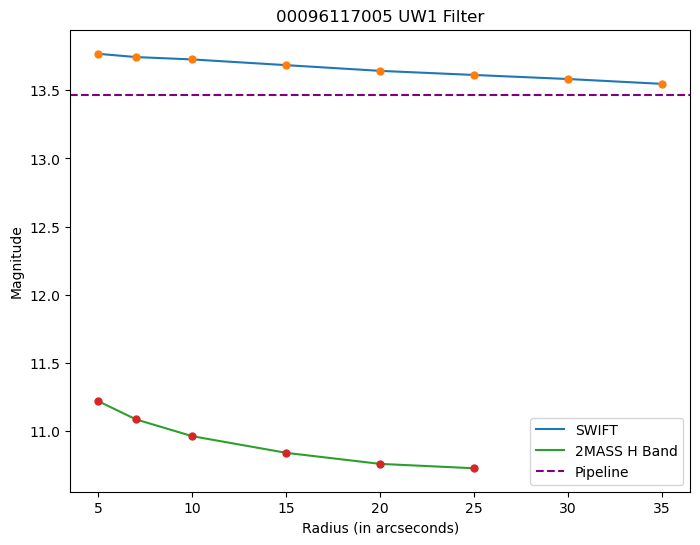

In [8]:
mag_plot('00096117005', 'uw1', 'h')

#### More Aesthetic Plot + Returns both UV and IR Magnitude values with errors

In [9]:
def mag_plot(obs_id, uv_filter, ir_filter):
    # Get current directory
    cdir = os.getcwd()

    # Initialize lists for magnitudes and errors
    mags = np.array([])
    errs = np.array([])

    # Define radii and loop over them
    radii = [5.000, 7.000, 10.000, 15.000, 20.000, 25.000, 30.000, 35.000]
    for radius in radii:
        filepath = f"{obs_id}/uvot/image/maghist_{uv_filter}_{str(radius)}00_{obs_id}_noapcorr.fits"
        if not os.path.exists(filepath):
            raise ValueError(f"{uv_filter} Filter does not exist for {obs_id}")
        maghist = fits.open(filepath)
        mag_data = Table(maghist[1].data)
        mags = np.append(mags, mag_data['AB_MAG'].mean())
        errs = np.append(errs, mag_data['AB_MAG_ERR'].mean())

    # Get index for 2MASS data
    idx = int(int(obs_id) / 1000 - 96107)

    # Define IR radii and loop over them
    ir_radii = [5, 7, 10, 15, 20, 25, 30]
    imags = np.array([])
    ierrs = np.array([])
    for r in ir_radii:
        imags = np.append(imags, two_mass.iloc[idx][[f'{ir_filter}_m_{r}']].values[0])
        ierrs = np.append(ierrs, two_mass.iloc[idx][[f'{ir_filter}_msig_{r}']].values[0])
    if ir_filter=='j':
        imags+=0.89
    elif ir_filter=='h':
        imags+=1.37
    else:
        imags+=1.84

    # Create the figure and axes with a black background
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.set_facecolor('k')

    # Plot SWIFT data with modified red color
    ax.plot(radii, mags, color='#069af3', linestyle='-', marker='o', markersize=5, label='SWIFT')
    ax.errorbar(radii, mags, yerr=errs, fmt='none', ecolor='#069af3', capsize=3)

    # Plot 2MASS data with modified blue color
    ax.plot(ir_radii, imags, color='tomato', linestyle='-', marker='o', markersize=5, label=f'2MASS {ir_filter.upper()} Band')
    ax.errorbar(ir_radii, imags, yerr=ierrs, fmt='none', ecolor='tomato', capsize=3)

    # Add horizontal line for pipeline magnitude with white color
    obs_data = phot.loc[phot['SWIFT Target ID'] == str(int(obs_id) / 1000)]
    if not obs_data.empty:
        uv_filter_map = {'uw2': 'UVW2', 'uw1': 'UVW1', 'uuu': 'U', 'um2': 'UVM2'}
        pipeline_filter = uv_filter_map[uv_filter]
        pipeline_mag = obs_data[pipeline_filter].values[0]
        ax.axhline(pipeline_mag, linestyle='--', color='white', label='Pipeline')

    # Set plot title, axis labels, and legend with white text color
    ax.set_title(f'{obs_id} {uv_filter.upper()} Filter', fontsize=16, color='white')
    ax.set_xlabel('Radius (in arcseconds)', fontsize=12, color='white')
    ax.set_ylabel('Magnitude', fontsize=12, color='white')
    ax.legend(fontsize=10, loc='best')

    # Customize plot aesthetics
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_edgecolor('white')
    ax.spines['left'].set_edgecolor('white')
    ax.tick_params(axis='both', which='both', direction='out', length=5, width=1, color='white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.set_axisbelow(True)

    # Set the figure facecolor to black
    fig.set_facecolor('black')

    # Show the plot
    plt.tight_layout()
#     plt.savefig(f'{obs_id}_{uv_filter}_{ir_filter}')
    plt.show()
    return mags, errs, imags, ierrs

##### Parameters of mag_plot function

1. Observation ID - Choose from the list of Observation IDs given in the readme file.
2. UV Filter - uvm2, uvw1, uvw2 or uuu
3. IR Filter - j, h or k

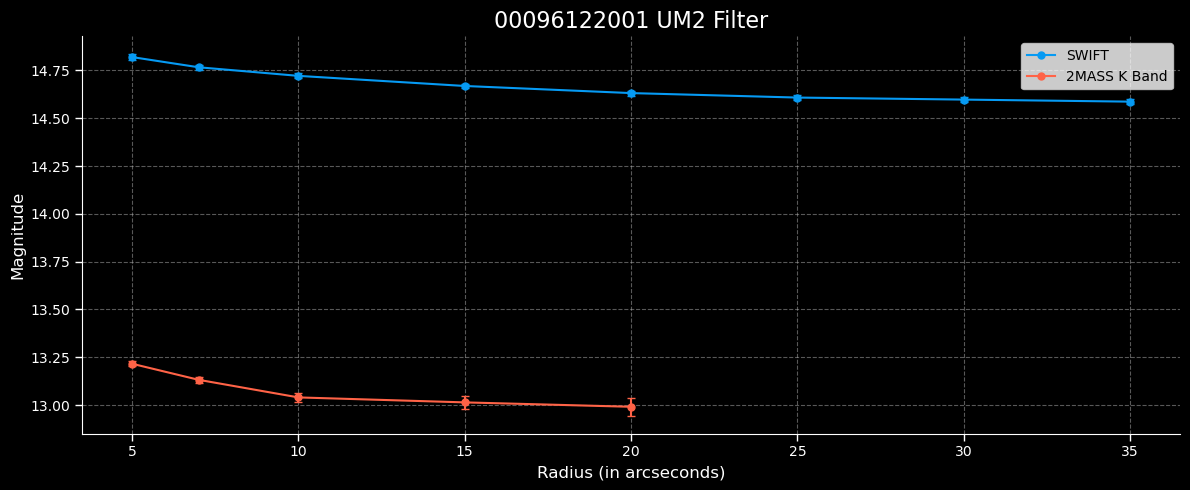

In [10]:
obs_id = '00096122001'
uv_fil = 'um2'
ir_fil = 'k'
mags, errs, imags, ierrs = mag_plot(obs_id, uv_fil, ir_fil)

#### Magnitude Difference for each radius

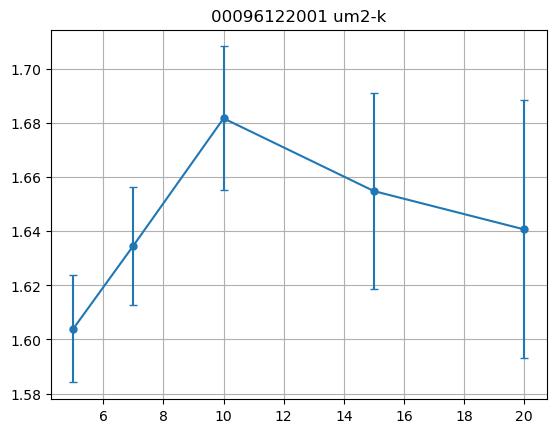

In [11]:
filters = ['uw1', 'uw2', 'um2', 'uuu']
radii = [5.000, 7.000, 10.000, 15.000, 20.000, 25.000, 30.000, 35.000]

while len(imags)<8:
    imags = np.append(imags,np.nan)
error = np.sqrt(errs[:7]**2+ierrs**2)
while len(error)<8:
    error = np.append(error,np.nan)
diff = mags-imags
plt.plot(radii, diff, linestyle='-', marker='o', markersize=5)
plt.errorbar(radii, diff, yerr=error, fmt='none', capsize=3)
plt.title(f'{obs_id} {uv_fil}-{ir_fil}')
plt.grid()
plt.savefig(f'{obs_id} {uv_fil}-{ir_fil} difference')
# plt.ylim(np.mean(diff)-2,np.mean(diff)+2);

#### Zero-Point Calculation

Calculating and comparing magnitudes, zero-points, and other data for different filters and radii within a specific observation ID context.

In [12]:
filters = ['uw1']
radii = [5.000, 7.000, 10.000, 15.000, 20.000, 25.000, 30.000, 35.000]
for obs_id in ['00096108001']:
    for filterr in filters:
        mags = []
        for radius in [35.000]:
            if os.path.exists(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}.fits"):
                maghist = fits.open(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}.fits")
                mag_data5 = Table(maghist[1].data)
                mags.append(mag_data5['CORR_RATE'].mean())
            else:
                print('no filter for this')
#         if mags:
#             plt.plot(radii, mags, label=f"{obs_id}_{filterr}")
#             plt.legend();
print(mag_data5['AB_MAG'])
print('ZEROPOINT')
print(2.5*np.log10(mag_data5['AP_COI_SRC_RATE'])+mag_data5['AB_MAG'])

  AB_MAG 
---------
  15.9365
15.829778
15.903608
ZEROPOINT
AP_COI_SRC_RATE
---------------
      18.686356
      18.685009
      18.685396


In [13]:
filters = ['uw1']
radii = [5.000, 7.000, 10.000, 15.000, 20.000, 25.000, 30.000, 35.000]
for obs_id in ['00096108001']:
    for filterr in filters:
        mags = []
        for radius in [35.000]:
            if os.path.exists(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}.fits"):
                maghist = fits.open(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}.fits")
                mag_data35 = Table(maghist[1].data)
                mags.append(mag_data35['CORR_RATE'].mean())
            else:
                continue
#         if mags:
#             plt.plot(radii, mags, label=f"{obs_id}_{filterr}")
#             plt.legend();
print(mag_data35['AB_MAG'])
print('ZEROPOINT')
print(2.5*np.log10(mag_data35['AP_COI_SRC_RATE'])+mag_data35['AB_MAG'])

  AB_MAG 
---------
  15.9365
15.829778
15.903608
ZEROPOINT
AP_COI_SRC_RATE
---------------
      18.686356
      18.685009
      18.685396


In [14]:
filters = ['uw1', 'uw2', 'um2', 'uuu']
radii = [5.000, 7.000, 10.000, 15.000, 20.000, 25.000, 30.000, 35.000]

# Initialize an empty list to store observation data
obs_data = []

# Iterate over the observation directories
for i, obs_id in enumerate(directories):
    # Iterate over the filters
    for filterr in filters:
        # Check if the file exists for the given filter
        if os.path.exists(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radii[0])}00_{obs_id}_noapcorr.fits"):
            # Create a dictionary to store data for this observation
            obs_entry = {'Observation ID': obs_id, 'Filter': filterr}
            
            # Iterate over the radii
            for radius in radii:
                # Check if the file exists for the given radius
                if os.path.exists(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}_noapcorr.fits"):
                    # Open the FITS file and extract the magnitude
                    fits_data = fits.open(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}_noapcorr.fits")[1].data
                    magnitude = np.mean(fits_data['MAG'])
                    
                    # Add the magnitude to the observation entry
                    obs_entry[f'Magnitude_{radius}'] = magnitude
            
            # Append the observation entry to the list
            obs_data.append(obs_entry)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(obs_data)

# Display the DataFrame
print(df)

KeyboardInterrupt: 

In [ ]:
df.to_csv('SWIFT UV Magnitudes.csv',index=False)

#### Aperture Correction Factor with Increasing Radius

This is a plot for the UVM2 filter

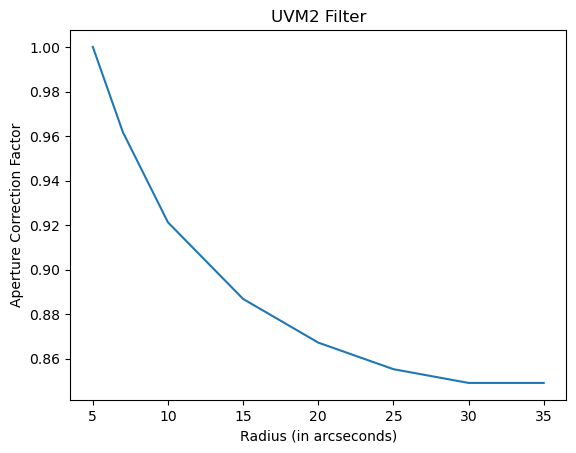

In [14]:
radii = [5,7,10,15,20,25,30,35]
ap_corr = [1.0000589,0.96177113,0.9212405,0.8868356,0.8672219,0.85528505,0.8491131,0.84911263]
plt.plot(radii,ap_corr)
plt.ylabel('Aperture Correction Factor')
plt.xlabel('Radius (in arcseconds)')
plt.title('UVM2 Filter');

#### Magnitude Difference between UV and IR for 2 Ranges (0-5" and 10"-Max)

For SWIFT UV Data,

Magnitude of Annulus = $Z_p - 2.5log_{10}(CR_{max}-CR_{10})$ where $Z_p$ is the zeropoint and $CR$ represents the count rate for different radii.

For 2MASS IR Data,

Magnitude of Annulus = $-2.5log_{10}(10^{\frac{M_2+48.6}{-2.5}}-10^{\frac{M_1+48.6}{-2.5}})-48.6$

[14.51320457 16.09728496] [0.00517187 0.00532577] [11.376      16.37922846] [0.014 0.069]


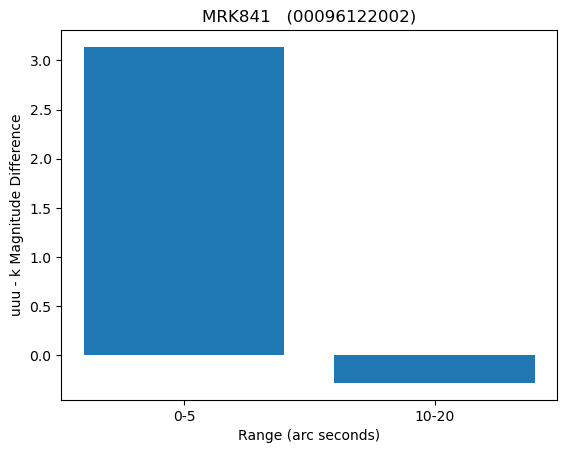

In [15]:
obs_id = '00096122002'
uv_filter = 'uuu'
ir_filter = 'k'
max_ap = 20
zp = 0

if uv_filter == 'uw1':
    zp=18.95
elif uv_filter == 'uuu':
    zp=19.36
elif uv_filter == 'um2':
    zp=18.54

# Initialize lists for magnitudes and errors
mags = np.array([])
errs = np.array([])

# Define radii and loop over them
filepath = f"{obs_id}/uvot/image/maghist_{uv_filter}_5.000_{obs_id}_noapcorr.fits"
if not os.path.exists(filepath):
    raise ValueError(f"{uv_filter} Filter does not exist for {obs_id}")
maghist = fits.open(filepath)
mag_data = Table(maghist[1].data)
mags = np.append(mags, mag_data['AB_MAG'].mean())
errs = np.append(errs, mag_data['AB_MAG_ERR'].mean())

filepath10 = f"{obs_id}/uvot/image/maghist_{uv_filter}_10.000_{obs_id}_noapcorr.fits"
maghist10 = fits.open(filepath10)
mag_data10 = Table(maghist10[1].data)
filepath_max = f"{obs_id}/uvot/image/maghist_{uv_filter}_{max_ap}.000_{obs_id}_noapcorr.fits"
maghist_max = fits.open(filepath_max)
mag_data_max = Table(maghist_max[1].data)
mags = np.append(mags, zp-2.5*np.log10(mag_data_max['AP_COI_SRC_RATE']-mag_data10['AP_COI_SRC_RATE']).mean())
errs = np.append(errs, (mag_data10['AB_MAG_ERR']+mag_data_max['AB_MAG_ERR']).mean())

# Get index for 2MASS data
idx = int(int(obs_id) / 1000 - 96107)

# Define IR radii and loop over them
imags = np.array([])
ierrs = np.array([])
imags = np.append(imags, two_mass.iloc[idx][[f'{ir_filter}_m_5']].values[0])
ierrs = np.append(ierrs, two_mass.iloc[idx][[f'{ir_filter}_msig_5']].values[0])
imag10 = two_mass.iloc[idx][[f'{ir_filter}_m_10']].values[0]
ierr10 = two_mass.iloc[idx][[f'{ir_filter}_msig_10']].values[0]
if ir_filter=='j':
    imag10+=0.89
elif ir_filter=='h':
    imag10+=1.37
else:
    imag10+=1.84
imag_max = two_mass.iloc[idx][[f'{ir_filter}_m_{max_ap}']].values[0]
ierr_max = two_mass.iloc[idx][[f'{ir_filter}_msig_{max_ap}']].values[0]
if ir_filter=='j':
    imag_max+=0.89
elif ir_filter=='h':
    imag_max+=1.37
else:
    imag_max+=1.84

imag_ann = -2.5*np.log10(10**((imag_max+48.6)/-2.5)-10**((imag10+48.6)/-2.5))-48.6
imags = np.append(imags, imag_ann)
ierrs = np.append(ierrs, ierr10+ierr_max)

print(mags, errs, imags, ierrs)

error = np.sqrt(errs**2+ierrs**2)
diff = mags-imags

ranges = ['0-5', f'10-{max_ap}']

plt.bar(ranges, diff)
plt.xlabel('Range (arc seconds)')
plt.ylabel(f'{uv_filter} - {ir_filter} Magnitude Difference')
plt.title(phot.loc[phot['SWIFT Target ID'] == str(int(int(obs_id) / 1000))]['Name'].values[0] + f'   ({obs_id})')
plt.savefig(f'{obs_id}_{uv_filter}_{ir_filter} Color Difference.png')
#plt.show()

### Zeropoint Correction Factor

In [16]:
filters = ['uuu']
radii = [5.000, 7.000, 10.000, 15.000, 20.000, 25.000, 30.000, 35.000]
for obs_id in ['00096108001']:
    for filterr in filters:
        mags = []
        for radius in [35.000]:
            if os.path.exists(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}_noapcorr.fits"):
                maghist = fits.open(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}_noapcorr.fits")
                mag_data35 = Table(maghist[1].data)
                mags.append(mag_data35['CORR_RATE'].mean())
            else:
                continue
#         if mags:
#             plt.plot(radii, mags, label=f"{obs_id}_{filterr}")
#             plt.legend();
# mag_data35
2.5*np.log10(mag_data35['CORR_RATE'])+mag_data35['AB_MAG']

<Column name='CORR_RATE' dtype='float32' length=3>
19.36
19.36
19.36

In [17]:
filters = ['uuu']
radii = [5.000, 7.000, 10.000, 15.000, 20.000, 25.000, 30.000, 35.000]
for obs_id in ['00096108001']:
    for filterr in filters:
        mags = []
        for radius in [5.000]:
            if os.path.exists(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}.fits"):
                maghist = fits.open(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius)}00_{obs_id}.fits")
                mag_data35 = Table(maghist[1].data)
                mags.append(mag_data35['CORR_RATE'].mean())
            else:
                continue
#         if mags:
#             plt.plot(radii, mags, label=f"{obs_id}_{filterr}")
#             plt.legend();
# mag_data35
2.5*np.log10(mag_data35['CORR_RATE'])+mag_data35['AB_MAG']

<Column name='CORR_RATE' dtype='float32' length=3>
19.36
19.36
19.36

In [18]:
mag_data35

<Table length=3>
      MET         EXTNAME         TSTART     ... QUALFLAG PHOTFLAG CORRFLAG
    float64        str12         float64     ...  int32    int32    int32  
--------------- ------------ --------------- ... -------- -------- --------
640832755.63961 uu640832728I  640832728.2559 ...     -999        2        0
640879435.46638 uu640879422I 640879422.60752 ...     -999        2        0
640913068.23658 uu640913026I 640913026.30596 ...     -999        2        0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


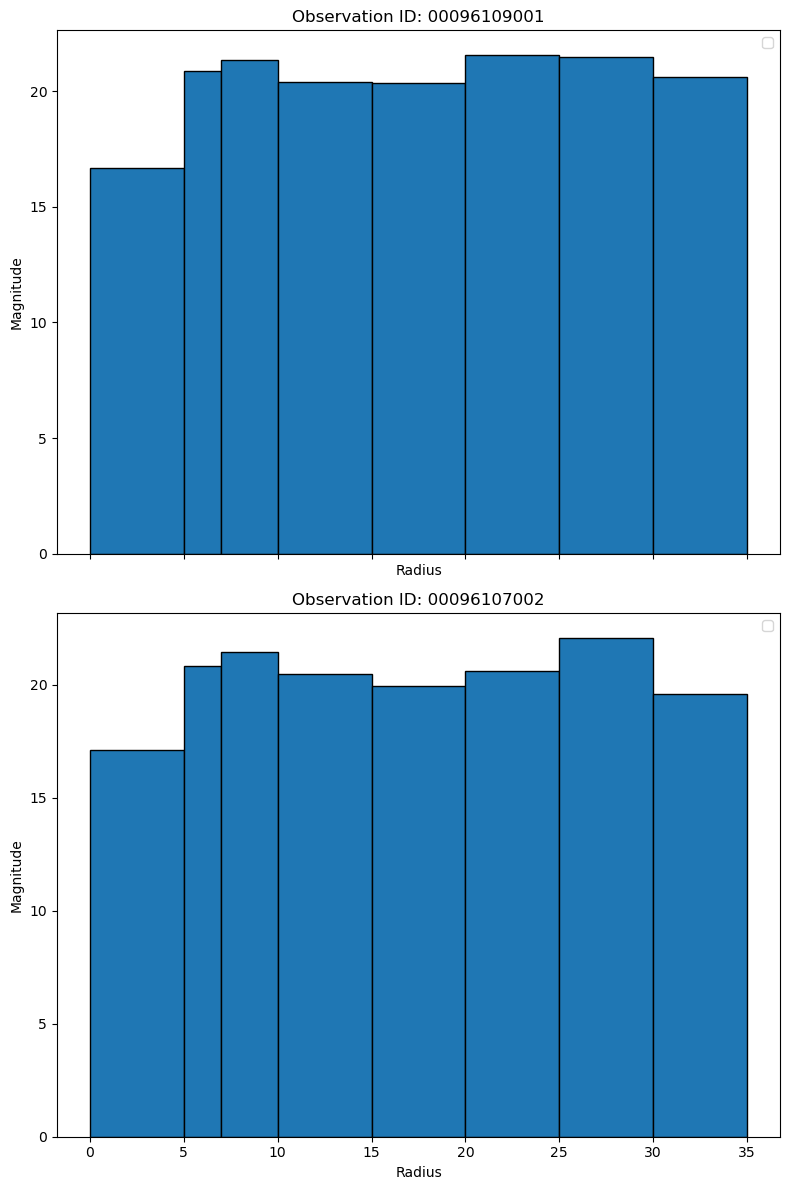

In [19]:
radii = [5.000, 7.000, 10.000, 15.000, 20.000, 25.000, 30.000, 35.000]
filters = ['uw1', 'uw2', 'um2', 'uuu']

max_ap = 20
zp = 0

num_plots = 2

# Set up the subplots
fig, axs = plt.subplots(num_plots, 1, figsize=(8, 6*num_plots), sharex=True)

ranges = ['0-5', '5-7', '7-10', '10-15', '15-20', '20-25', '25-30', '30-35']
bin_ranges = [0,5,7,10,15,20,25,30,35]

for j, obs_id in enumerate(['00096109001','00096107002']):
    for filterr in filters:
        if filterr == 'uw1':
            zp=18.95
        elif filterr == 'uuu':
            zp=19.36
        elif filterr == 'um2':
            zp=18.54
        mags = []
        filepath = f"{obs_id}/uvot/image/maghist_{filterr}_5.000_{obs_id}_noapcorr.fits"
        if os.path.exists(filepath):
            maghist = fits.open(filepath)
            mag_data = Table(maghist[1].data)
            mags.append(mag_data['AB_MAG'].mean())
        for i in range(len(radii)):
            if i>6:
                break
            radius1 = radii[i]
            radius2 = radii[i+1]
            if os.path.exists(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius1)}00_{obs_id}.fits"):
                maghist1 = fits.open(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius1)}00_{obs_id}.fits")
                mag_data1 = Table(maghist1[1].data)
#                 print(mag_data1['CORR_RATE'])
            if os.path.exists(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius2)}00_{obs_id}.fits"):
                maghist2 = fits.open(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius2)}00_{obs_id}.fits")
                mag_data2 = Table(maghist2[1].data)
#                 print(mag_data2['CORR_RATE'])
                mags.append(zp-2.5*np.log10(mag_data2['CORR_RATE'].mean()-mag_data1['CORR_RATE'].mean()))
            else:
                continue
        if len(mags)==8:
            # Plot the magnitudes for the filter and observation ID in the respective subplot
            axs[j].hist(bin_ranges[:-1], bin_ranges, weights=mags, edgecolor='k')
            axs[j].set_title(f"Observation ID: {obs_id}")
            axs[j].set_xlabel('Radius')
            axs[j].set_ylabel('Magnitude')
    
    # Add a legend to each subplot
    axs[j].legend()
                
# Define radii and loop over them
filepath = f"{obs_id}/uvot/image/maghist_{uv_filter}_5.000_{obs_id}_noapcorr.fits"
# if not os.path.exists(filepath):
#     raise ValueError(f"{uv_filter} Filter does not exist for {obs_id}")
# maghist = fits.open(filepath)
# mag_data = Table(maghist[1].data)
# mags = np.append(mags, mag_data['AB_MAG'].mean())
# errs = np.append(errs, mag_data['AB_MAG_ERR'].mean())

# filepath10 = f"{obs_id}/uvot/image/maghist_{uv_filter}_10.000_{obs_id}_noapcorr.fits"
# maghist10 = fits.open(filepath10)
# mag_data10 = Table(maghist10[1].data)
# filepath_max = f"{obs_id}/uvot/image/maghist_{uv_filter}_{max_ap}.000_{obs_id}_noapcorr.fits"
# maghist_max = fits.open(filepath_max)
# mag_data_max = Table(maghist_max[1].data)
# mags = np.append(mags, zp-2.5*np.log10(mag_data_max['AP_COI_SRC_RATE']-mag_data10['AP_COI_SRC_RATE']).mean())
# errs = np.append(errs, (mag_data10['AB_MAG_ERR']+mag_data_max['AB_MAG_ERR']).mean())

# print(mags)
# plt.scatter(ranges, mags)
# plt.xlabel('Range (arc seconds)')
# plt.ylabel(f'{uv_filter} - {ir_filter} Magnitude Difference')
# plt.title(phot.loc[phot['SWIFT Target ID'] == str(int(int(obs_id) / 1000))]['Name'].values[0] + f'   ({obs_id})')

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

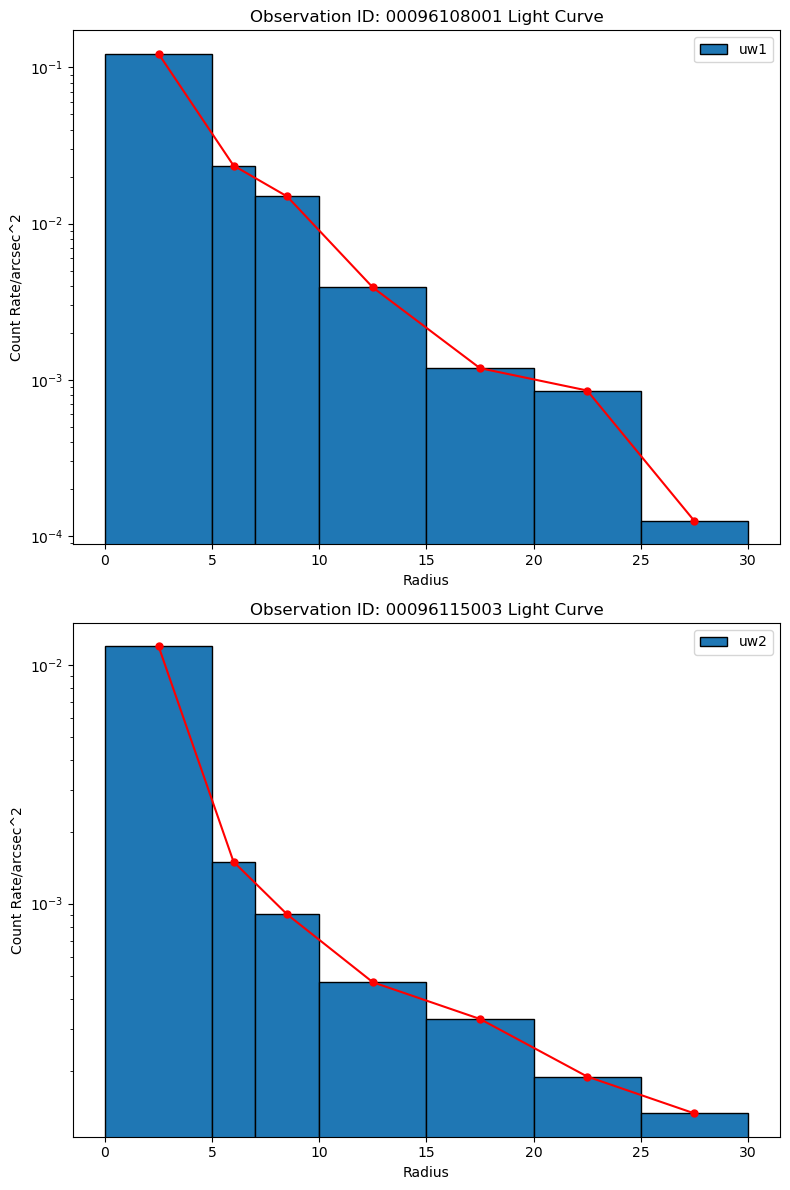

In [21]:
radii = [5.000, 7.000, 10.000, 15.000, 20.000, 25.000, 30.000]
filters = ['uw1', 'uw2', 'um2', 'uuu']

max_ap = 20
zp = 0

if uv_filter == 'uw1':
    zp=18.95
elif uv_filter == 'uuu':
    zp=19.36
elif uv_filter == 'um2':
    zp=18.54

num_plots = 2

# Set up the subplots
fig, axs = plt.subplots(num_plots, 1, figsize=(8, 6*num_plots))

ranges = ['0-5', '5-7', '7-10', '10-15', '15-20', '20-25', '25-30']
bin_ranges = [0,5,7,10,15,20,25,30]
radii_mid = [2.5,6,8.5,12.5,17.5,22.5,27.5]

for j, obs_id in enumerate(['00096108001','00096115003']):
    for filterr in filters:
        if filterr == 'uw1':
            zp=18.95
        elif filterr == 'uuu':
            zp=19.36
        elif filterr == 'um2':
            zp=18.54
        counts = []
        filepath = f"{obs_id}/uvot/image/maghist_{filterr}_5.000_{obs_id}_noapcorr.fits"
        if os.path.exists(filepath):
            maghist = fits.open(filepath)
            mag_data = Table(maghist[1].data)
            counts.append((mag_data['CORR_RATE'].mean())/(np.pi*(radii[0]**2)))
        for i in range(len(radii)):
            if i>5:
                break
            radius1 = radii[i]
            radius2 = radii[i+1]
            if os.path.exists(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius1)}00_{obs_id}.fits"):
                maghist1 = fits.open(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius1)}00_{obs_id}.fits")
                mag_data1 = Table(maghist1[1].data)
#                 print(mag_data1['CORR_RATE'])
            if os.path.exists(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius2)}00_{obs_id}.fits"):
                maghist2 = fits.open(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius2)}00_{obs_id}.fits")
                mag_data2 = Table(maghist2[1].data)
#                 print(mag_data2['CORR_RATE'])
                counts.append((mag_data2['CORR_RATE'].mean()-mag_data1['CORR_RATE'].mean())/(np.pi*(radius2**2-radius1**2)))
            else:
                continue
        if counts and len(counts)==7 and counts[0]>=0:
            # Plot the magnitudes for the filter and observation ID in the respective subplot
            axs[j].hist(bin_ranges[:-1], bin_ranges, weights=counts, edgecolor='k', label=f"{filterr}")
            axs[j].plot(radii_mid, counts, color='red', linestyle='-', marker='o', markersize=5)
            axs[j].set_title(f"Observation ID: {obs_id} Light Curve")
            axs[j].set_xlabel('Radius')
            axs[j].set_ylabel('Count Rate/arcsec^2')
            axs[j].set_yscale('log')
#             print(counts)
            break
    
    # Add a legend to each subplot
    axs[j].legend()
                
# Define radii and loop over them
filepath = f"{obs_id}/uvot/image/maghist_{uv_filter}_5.000_{obs_id}_noapcorr.fits"
# if not os.path.exists(filepath):
#     raise ValueError(f"{uv_filter} Filter does not exist for {obs_id}")
# maghist = fits.open(filepath)
# mag_data = Table(maghist[1].data)
# mags = np.append(mags, mag_data['AB_MAG'].mean())
# errs = np.append(errs, mag_data['AB_MAG_ERR'].mean())

# filepath10 = f"{obs_id}/uvot/image/maghist_{uv_filter}_10.000_{obs_id}_noapcorr.fits"
# maghist10 = fits.open(filepath10)
# mag_data10 = Table(maghist10[1].data)
# filepath_max = f"{obs_id}/uvot/image/maghist_{uv_filter}_{max_ap}.000_{obs_id}_noapcorr.fits"
# maghist_max = fits.open(filepath_max)
# mag_data_max = Table(maghist_max[1].data)
# mags = np.append(mags, zp-2.5*np.log10(mag_data_max['AP_COI_SRC_RATE']-mag_data10['AP_COI_SRC_RATE']).mean())
# errs = np.append(errs, (mag_data10['AB_MAG_ERR']+mag_data_max['AB_MAG_ERR']).mean())

# print(mags)
# plt.scatter(ranges, mags)
# plt.xlabel('Range (arc seconds)')
# plt.ylabel(f'{uv_filter} - {ir_filter} Magnitude Difference')
# plt.title(phot.loc[phot['SWIFT Target ID'] == str(int(int(obs_id) / 1000))]['Name'].values[0] + f'   ({obs_id})')

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

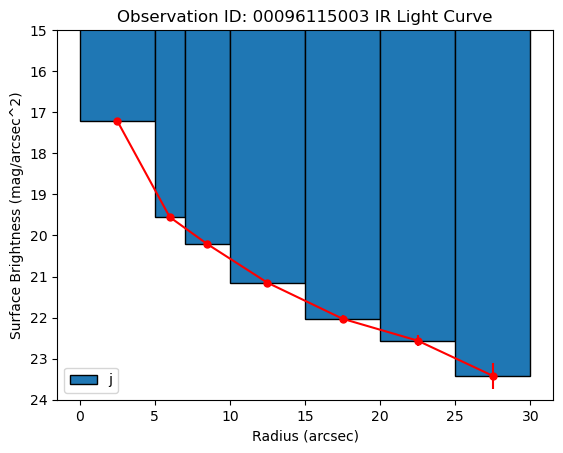

In [22]:
obs_id = '00096115003'
ir_filter='j'
idx = int(int(obs_id) / 1000 - 96107)
radiis = [5,7,10,15,20,25,30]
max_ap = 30
r = 10
imags = np.array([])
ierrs = np.array([])
imags = np.append(imags, two_mass.iloc[idx][[f'{ir_filter}_m_5']].values[0]+2.5*np.log10(np.pi*5**2))
ierrs = np.append(ierrs, two_mass.iloc[idx][[f'{ir_filter}_msig_5']].values[0])
for i in range(len(radiis)):
    if i>5:
        break
    r1 = radiis[i]
    r2 = radiis[i+1]
    imag_r1 = two_mass.iloc[idx][[f'{ir_filter}_m_{r1}']].values[0]
    ierr_r1 = two_mass.iloc[idx][[f'{ir_filter}_msig_{r1}']].values[0]
    if ir_filter=='j':
        imag_r1+=0.89
    elif ir_filter=='h':
        imag_r1+=1.37
    else:
        imag_r1+=1.84
    imag_r2 = two_mass.iloc[idx][[f'{ir_filter}_m_{r2}']].values[0]
    ierr_r2 = two_mass.iloc[idx][[f'{ir_filter}_msig_{r2}']].values[0]
    if ir_filter=='j':
        imag_r2+=0.89
    elif ir_filter=='h':
        imag_r2+=1.37
    else:
        imag_r2+=1.84
    iflux1 = 10**((imag_r1+48.6)/-2.5)
    iflux2 = 10**((imag_r2+48.6)/-2.5)
    iflerr1 = iflux1*0.4*ierr_r1
    iflerr2 = iflux2*0.4*ierr_r2
    imag_ann = (-2.5*np.log10(10**((imag_r2+48.6)/-2.5)-10**((imag_r1+48.6)/-2.5))-48.6)+2.5*np.log10(np.pi*(r2**2-r1**2))
    imags = np.append(imags, imag_ann)
    ierrs = np.append(ierrs, np.sqrt(iflerr1**2+iflerr2**2)/(iflux2-iflux1))
plt.hist(bin_ranges[:-1], bin_ranges, weights=imags, edgecolor='k', label=f"{ir_filter}")
plt.errorbar(radii_mid, imags, yerr=ierrs, color='red', linestyle='-', marker='o', markersize=5)
plt.title(f"Observation ID: {obs_id} IR Light Curve")
plt.xlabel('Radius (arcsec)')
plt.ylabel('Surface Brightness (mag/arcsec^2)')
plt.ylim(24,15)
plt.legend()
# plt.invert_yaxis()

In [23]:
np.sqrt(iflerr1**2+iflerr2**2)/(iflux2-iflux1)

0.3098349950421472

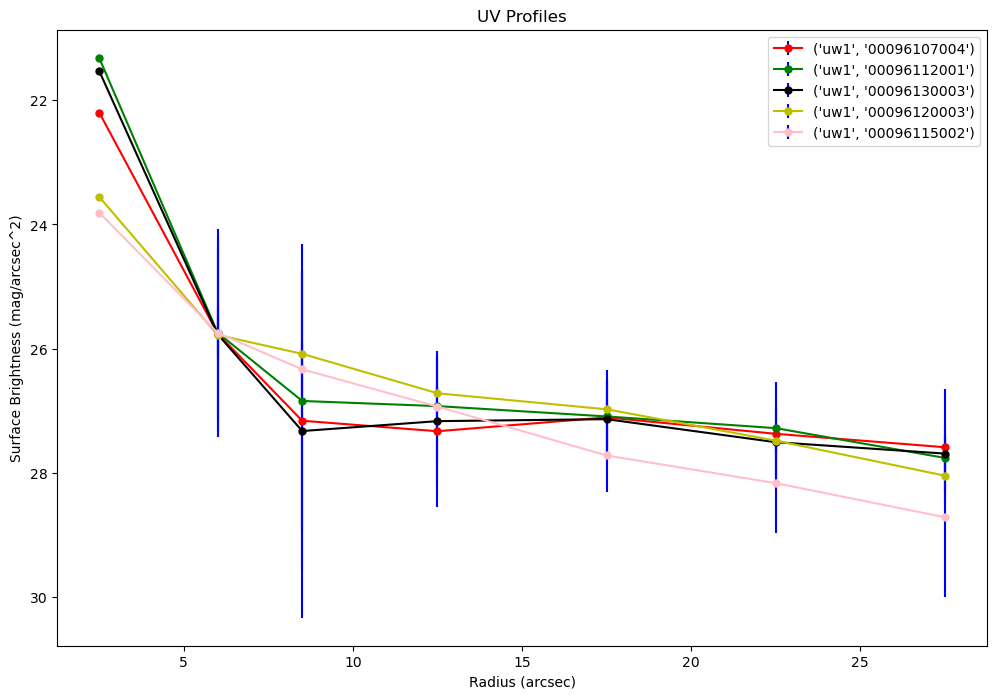

[23.81003819 25.7481301  26.33548166 26.93528462 27.72250367 28.16831904
 28.71725552] [0.04115814 0.42217136 0.39149279 0.33365436 0.58585349 0.80522109
 1.28202021]


In [48]:
radii = [5.000, 7.000, 10.000, 15.000, 20.000, 25.000, 30.000]
filters = ['uw1', 'uw2', 'um2', 'uuu']
obs_ids = ['00096107004', '00096112001', '00096130003','00096120003','00096115002']
obs_id_extra = ['00096120003','00096132002', '00096115002', '00096114001', '00096107004', '00096112001']
max_ap = 20
zp = 0
colors = ['r','g','k','y','pink','orange']
xerr=[2.5,1,1.5,2.5,2.5,2.5,2.5],

if uv_filter == 'uw1':
    zp=18.95
elif uv_filter == 'uuu':
    zp=19.36
elif uv_filter == 'um2':
    zp=18.54

num_plots = 6

# Set up the subplots
# fig, axs = plt.subplots(num_plots, 1, figsize=(8, 6*num_plots))

ranges = ['0-5', '5-7', '7-10', '10-15', '15-20', '20-25', '25-30']
bin_ranges = [0,5,7,10,15,20,25,30]
radii_mid = [2.5,6,8.5,12.5,17.5,22.5,27.5]

for j, obs_id in enumerate(obs_ids):
    for filterr in filters:
        if filterr == 'uw2':
            continue
        if filterr == 'uw1':
            zp=18.95
        elif filterr == 'uuu':
            zp=19.36
        elif filterr == 'um2':
            zp=18.54
        mags = np.array([])
        mag_err = np.array([])
        filepath = f"{obs_id}/uvot/image/maghist_{filterr}_5.000_{obs_id}_noapcorr.fits"
#         print([filepath,os.path.exists(filepath)])
        if os.path.exists(filepath):
            maghist = fits.open(filepath)
            mag_data = Table(maghist[1].data)
            mags = np.append(mags, zp-2.5*np.log10(mag_data['AP_COI_SRC_RATE'].mean())+2.5*np.log10(np.pi*5**2))
#             mag_err = np.append(mag_err, mag_data['AB_MAG_ERR'].mean())
            mag_err = np.append(mag_err, mag_data['AP_COI_SRC_RATE_ERR'].mean()/mag_data['AP_COI_SRC_RATE'].mean())
        for i in range(len(radii)):
            if i>5:
                break
            radius1 = radii[i]
            radius2 = radii[i+1]
            if os.path.exists(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius1)}00_{obs_id}.fits"):
                maghist1 = fits.open(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius1)}00_{obs_id}.fits")
                mag_data1 = Table(maghist1[1].data)
#                 print(obs_id, mag_data1['CORR_RATE'])
            if os.path.exists(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius2)}00_{obs_id}.fits"):
                maghist2 = fits.open(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius2)}00_{obs_id}.fits")
                mag_data2 = Table(maghist2[1].data)
#                 print(obs_id, mag_data2['CORR_RATE'])
                ann_area = np.pi*(radius2**2-radius1**2)
                mags = np.append(mags, zp-2.5*np.log10((mag_data2['AP_COI_SRC_RATE'].mean()-mag_data1['AP_COI_SRC_RATE'].mean()))+2.5*np.log10(ann_area))
#                 mag_err = np.append(mag_err, (mag_data2['AB_MAG_ERR'].mean()+mag_data1['AB_MAG_ERR'].mean()))
                mag_err = np.append(mag_err, np.sqrt(mag_data2['AP_COI_SRC_RATE_ERR'].mean()**2+mag_data1['AP_COI_SRC_RATE_ERR'].mean()**2)/(mag_data2['AP_COI_SRC_RATE'].mean()-mag_data1['AP_COI_SRC_RATE'].mean()))
            else:
                continue
        if obs_id=='00096112001':
            mags += 1.9
        if obs_id=='00096130003':
            mags += 1.75
        if obs_id=='00096120003':
            mags += 1.9
        if obs_id=='00096115002':
            mags += 0.3
        if len(mags)==7 and mags[0]>=0:
            # Plot the magnitudes for the filter and observation ID in the respective subplot
#             mags = zp-2.5*np.log10(counts)
#             axs[j].hist(bin_ranges[:-1], bin_ranges, weights=mags, edgecolor='k', label=f"{filterr}")
            plt.errorbar(radii_mid, mags, yerr=mag_err, ecolor='b', color=colors[j], linestyle='-', marker='o', markersize=5, label=f"{filterr, obs_id}")
#             axs[j].set_title(f"Observation ID: {obs_id} UV Profile")
#             axs[j].set_xlabel('Radius (arcsec)')
#             axs[j].set_ylabel('Surface Brightness (mag/arcsec^2)')
#             axs[j].set_ylim(min(mags)-1,max(mags)+1)
#             axs[j].invert_yaxis()
            plt.gca().invert_yaxis()
            plt.title(f"UV Profiles")
            plt.xlabel('Radius (arcsec)')
            plt.ylabel('Surface Brightness (mag/arcsec^2)')
#             axs[j].set_yscale('log')
    #             print(counts)
            break
    
    # Add a legend to each subplot
    plt.legend()

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.show()
print(mags, mag_err)

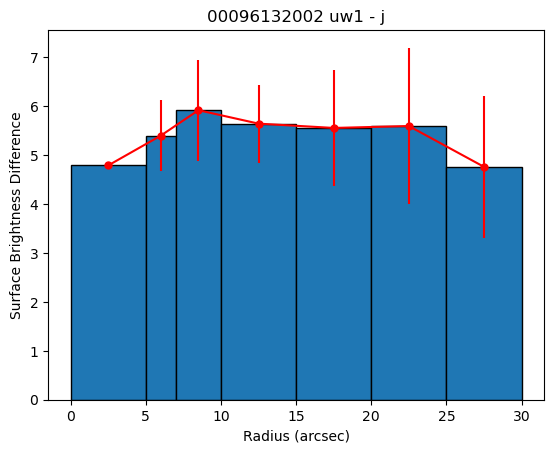

In [76]:
plt.hist(bin_ranges[:-1], bin_ranges, weights=mags-imags, edgecolor='k', label=f"{filterr}")
plt.errorbar(radii_mid, mags-imags, yerr=np.sqrt(mag_err**2+ierrs**2), color='red', linestyle='-', marker='o', markersize=5)
plt.ylabel(f"Surface Brightness Difference")
plt.xlabel("Radius (arcsec)")
plt.title(f"{obs_id} {filterr} - {ir_filter}");

In [62]:
def color(obs_id, ir_filter, uv_filter):
    fig, axs = plt.subplots(3, 1, figsize=(8, 18))
    obs_id = obs_id
    ir_filter = ir_filter
    idx = int(int(obs_id) / 1000 - 96107)
    radiis = [5,7,10,15,20,25,30]
    bin_ranges = [0,5,7,10,15,20,25,30]
    radii_mid = [2.5,6,8.5,12.5,17.5,22.5,27.5]
    max_ap = 30
    r = 10
    imags = np.array([])
    ierrs = np.array([])
    imags = np.append(imags, two_mass.iloc[idx][[f'{ir_filter}_m_5']].values[0]+2.5*np.log10(np.pi*5**2))
    ierrs = np.append(ierrs, two_mass.iloc[idx][[f'{ir_filter}_msig_5']].values[0])
    for i in range(len(radiis)):
        if i>5:
            break
        r1 = radiis[i]
        r2 = radiis[i+1]
        imag_r1 = two_mass.iloc[idx][[f'{ir_filter}_m_{r1}']].values[0]
        ierr_r1 = two_mass.iloc[idx][[f'{ir_filter}_msig_{r1}']].values[0]
        if ir_filter=='j':
            imag_r1+=0.89
        elif ir_filter=='h':
            imag_r1+=1.37
        else:
            imag_r1+=1.84
        imag_r2 = two_mass.iloc[idx][[f'{ir_filter}_m_{r2}']].values[0]
        ierr_r2 = two_mass.iloc[idx][[f'{ir_filter}_msig_{r2}']].values[0]
        if ir_filter=='j':
            imag_r2+=0.89
        elif ir_filter=='h':
            imag_r2+=1.37
        else:
            imag_r2+=1.84
        iflux1 = 10**((imag_r1+48.6)/-2.5)
        iflux2 = 10**((imag_r2+48.6)/-2.5)
        iflerr1 = iflux1*0.4*ierr_r1
        iflerr2 = iflux2*0.4*ierr_r2
        imag_ann = (-2.5*np.log10(10**((imag_r2+48.6)/-2.5)-10**((imag_r1+48.6)/-2.5))-48.6)+2.5*np.log10(np.pi*(r2**2-r1**2))
        imags = np.append(imags, imag_ann)
        ierrs = np.append(ierrs, np.sqrt(iflerr1**2+iflerr2**2)/(iflux2-iflux1))
    last_valid_index = np.where(~np.isnan(imags))[0][-1]

    # Iterate through the array and replace NaN values with the last valid value
    for i in range(len(imags)):
        if np.isnan(imags[i]):
            imags[i] = imags[last_valid_index]
            ierrs[i] = ierrs[last_valid_index]
    axs[0].hist(bin_ranges[:-1], bin_ranges, weights=imags, edgecolor='k', label=f"{ir_filter}")
    axs[0].errorbar(radii_mid, imags, yerr=ierrs, color='red', linestyle='-', marker='o', markersize=5)
    axs[0].set_title(f"Observation ID: {obs_id} IR Light Curve")
    axs[0].set_xlabel('Radius (arcsec)')
    axs[0].set_ylabel('Surface Brightness (mag/arcsec^2)')
    axs[0].set_ylim(min(imags)-1,max(imags)+1)
    axs[0].legend()
    axs[0].invert_yaxis()
    radii = [5.000, 7.000, 10.000, 15.000, 20.000, 25.000, 30.000]
    filters = ['uw1', 'uw2', 'um2', 'uuu']
    max_ap = 20
    zp = 0

    ranges = ['0-5', '5-7', '7-10', '10-15', '15-20', '20-25', '25-30']

    if uv_filter == 'uw1':
        zp=18.95
    elif uv_filter == 'uuu':
        zp=19.36
    elif uv_filter == 'um2':
        zp=18.54
    mags = np.array([])
    mag_err = np.array([])
    filepath = f"{obs_id}/uvot/image/maghist_{uv_filter}_5.000_{obs_id}_noapcorr.fits"
    if os.path.exists(filepath):
        maghist = fits.open(filepath)
        mag_data = Table(maghist[1].data)
        mags = np.append(mags, zp-2.5*np.log10(mag_data['AP_COI_SRC_RATE'].mean())+2.5*np.log10(np.pi*5**2))
#             mag_err = np.append(mag_err, mag_data['AB_MAG_ERR'].mean())
        mag_err = np.append(mag_err, mag_data['AP_COI_SRC_RATE_ERR'].mean()/mag_data['AP_COI_SRC_RATE'].mean())
    for i in range(len(radii)):
        if i>5:
            break
        radius1 = radii[i]
        radius2 = radii[i+1]
        if os.path.exists(f"{obs_id}/uvot/image/maghist_{uv_filter}_{str(radius1)}00_{obs_id}.fits"):
            maghist1 = fits.open(f"{obs_id}/uvot/image/maghist_{uv_filter}_{str(radius1)}00_{obs_id}.fits")
            mag_data1 = Table(maghist1[1].data)
#                 print(mag_data1['CORR_RATE'])
        if os.path.exists(f"{obs_id}/uvot/image/maghist_{uv_filter}_{str(radius2)}00_{obs_id}.fits"):
            maghist2 = fits.open(f"{obs_id}/uvot/image/maghist_{uv_filter}_{str(radius2)}00_{obs_id}.fits")
            mag_data2 = Table(maghist2[1].data)
#                 print(mag_data2['CORR_RATE'])
            ann_area = np.pi*(radius2**2-radius1**2)
            mags = np.append(mags, zp-2.5*np.log10((mag_data2['AP_COI_SRC_RATE'].mean()-mag_data1['AP_COI_SRC_RATE'].mean()))+2.5*np.log10(ann_area))
#                 mag_err = np.append(mag_err, (mag_data2['AB_MAG_ERR'].mean()+mag_data1['AB_MAG_ERR'].mean()))
            mag_err = np.append(mag_err, np.sqrt(mag_data2['AP_COI_SRC_RATE_ERR'].mean()**2+mag_data1['AP_COI_SRC_RATE_ERR'].mean()**2)/(mag_data2['AP_COI_SRC_RATE'].mean()-mag_data1['AP_COI_SRC_RATE'].mean()))
        else:
            continue
    if len(mags)==7 and mags[0]>=0:
        # Plot the magnitudes for the filter and observation ID in the respective subplot
#             mags = zp-2.5*np.log10(counts)
        axs[1].hist(bin_ranges[:-1], bin_ranges, weights=mags, edgecolor='k', label=f"{filterr}")
        axs[1].errorbar(radii_mid, mags, yerr=mag_err, color='red', linestyle='-', marker='o', markersize=5)
        axs[1].set_title(f"Observation ID: {obs_id} UV Light Curve")
        axs[1].set_xlabel('Radius (arcsec)')
        axs[1].set_ylabel('Surface Brightness (mag/arcsec^2)')
        axs[1].set_ylim(min(mags)-1,max(mags)+1)
        axs[1].invert_yaxis()

        # Add a legend to each subplot
    axs[1].legend()

    # Adjust the spacing between subplots
    
    axs[2].hist(bin_ranges[:-1], bin_ranges, weights=mags-imags, edgecolor='k', label=f"{filterr}")
    axs[2].errorbar(radii_mid, mags-imags, yerr=np.sqrt(mag_err**2+ierrs**2), color='red', linestyle='-', marker='o', markersize=5)
    axs[2].set_ylabel(f"Surface Brightness Difference")
    axs[2].set_xlabel("Radius (arcsec)")
    axs[2].set_title(f"{obs_id} {uv_filter} - {ir_filter}")
#     fig.tight_layout();

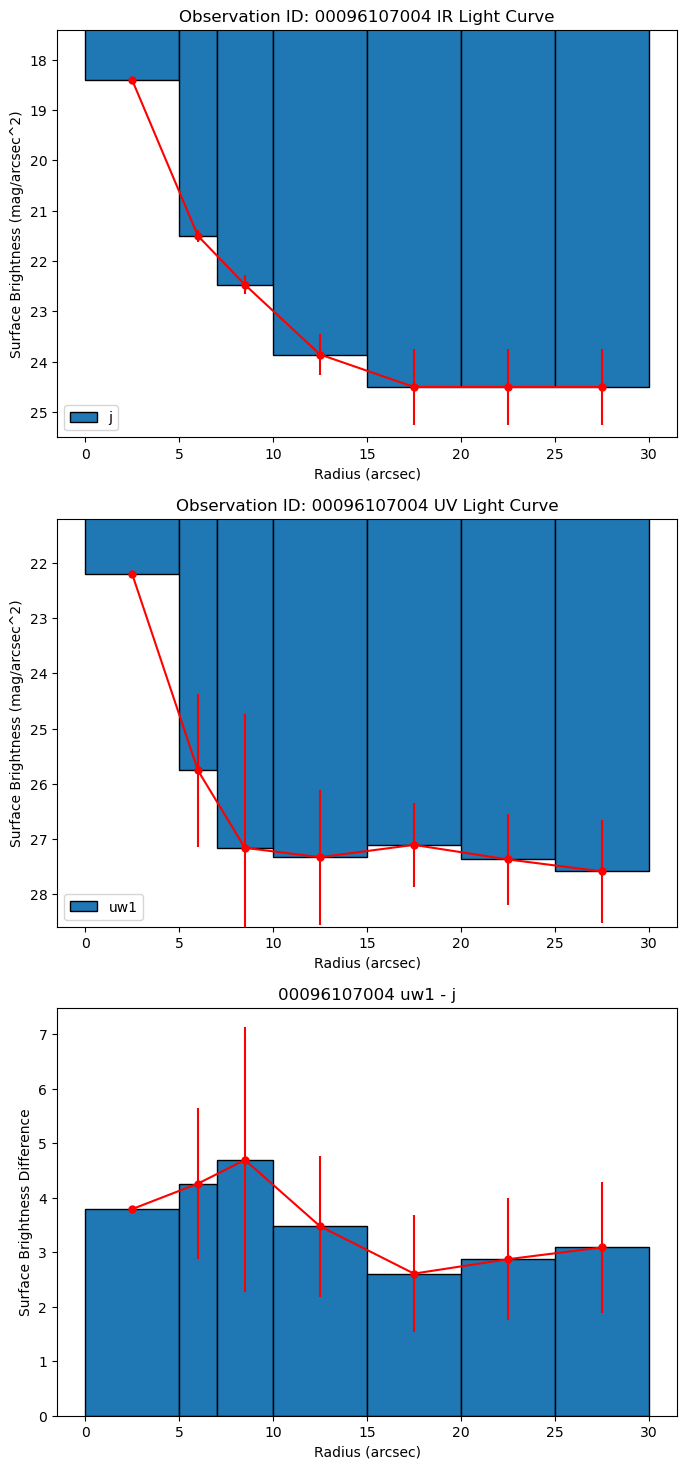

In [63]:
color('00096107004','j','uw1')

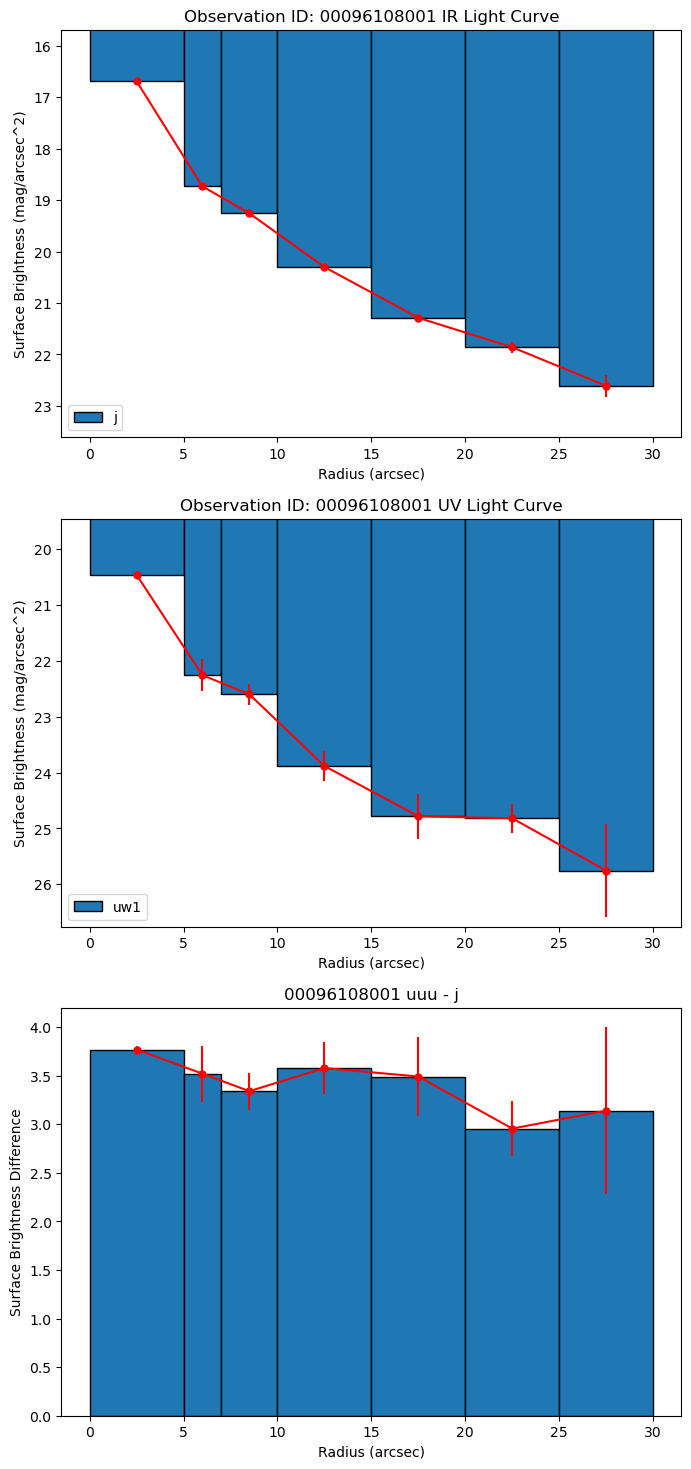

In [64]:
color('00096108001','j','uuu')

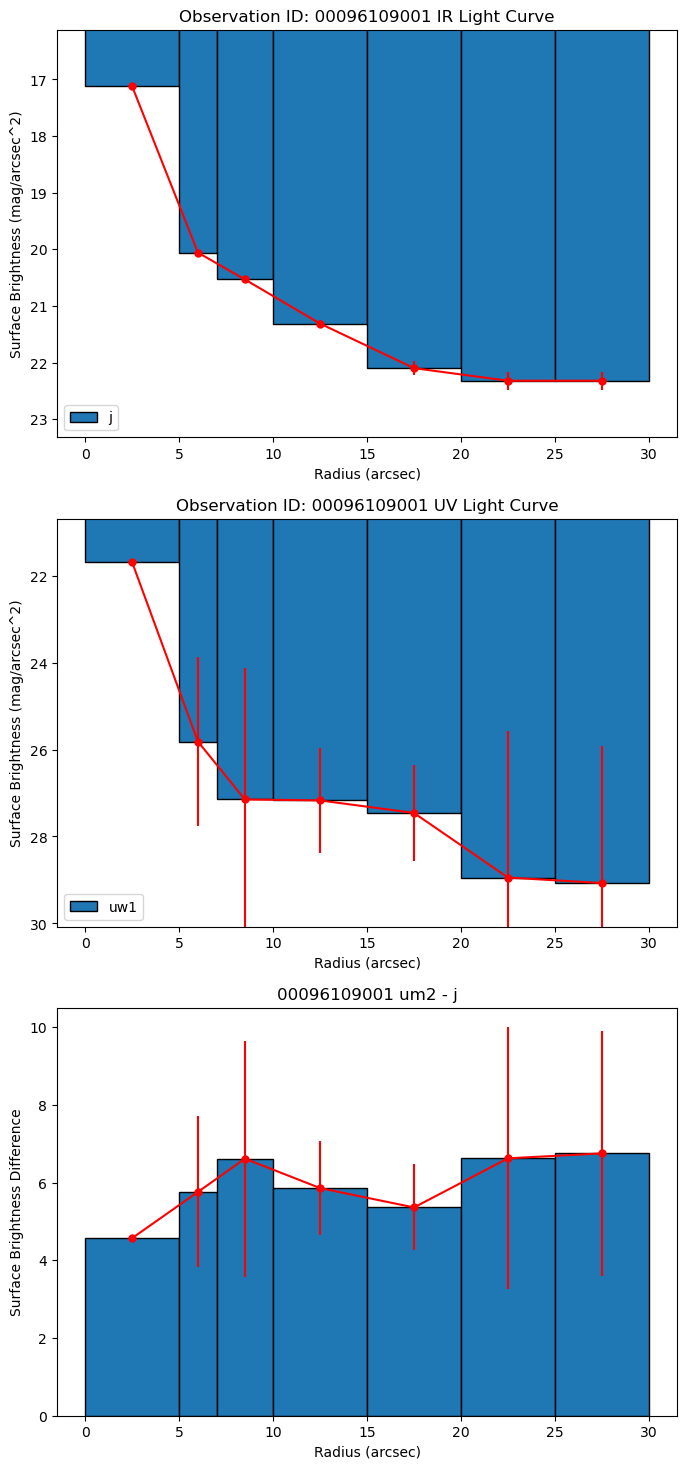

In [65]:
color('00096109001','j','um2')

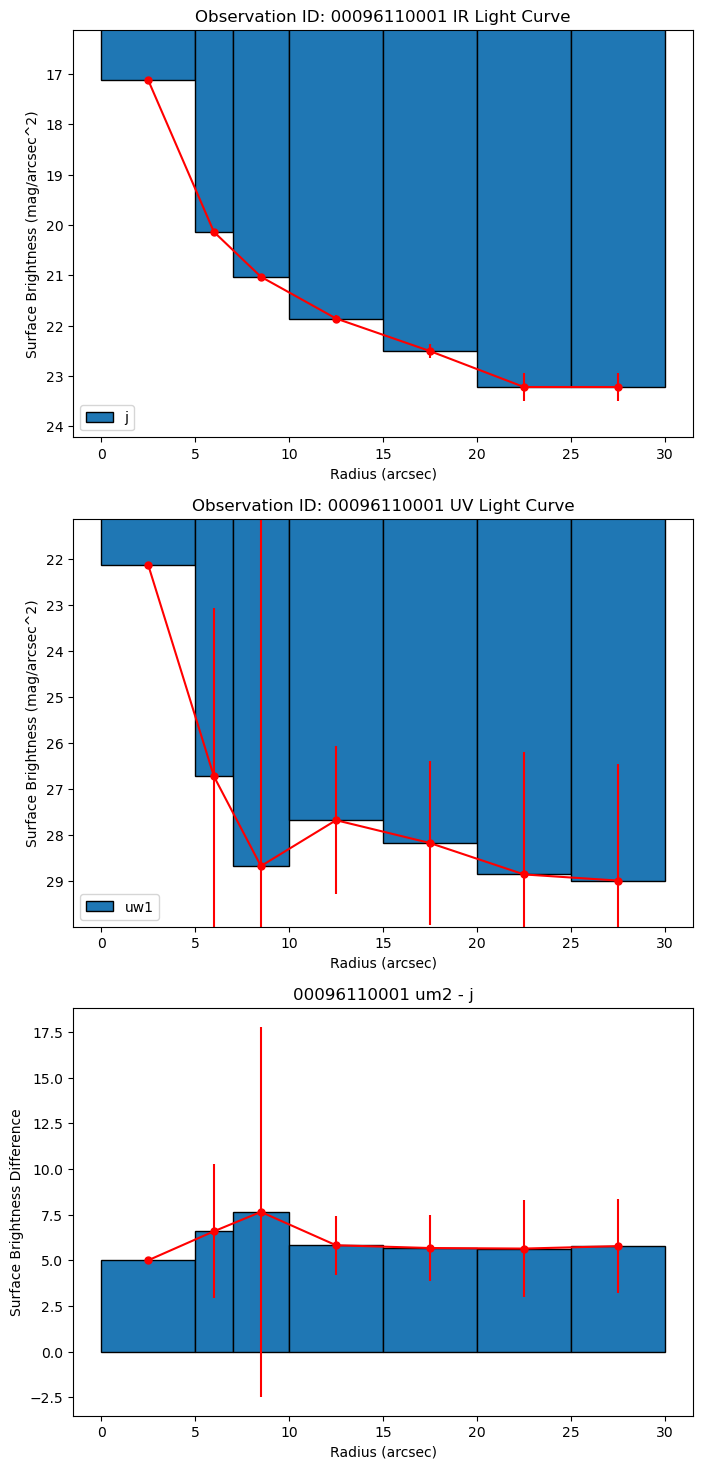

In [66]:
color('00096110001','j','um2')

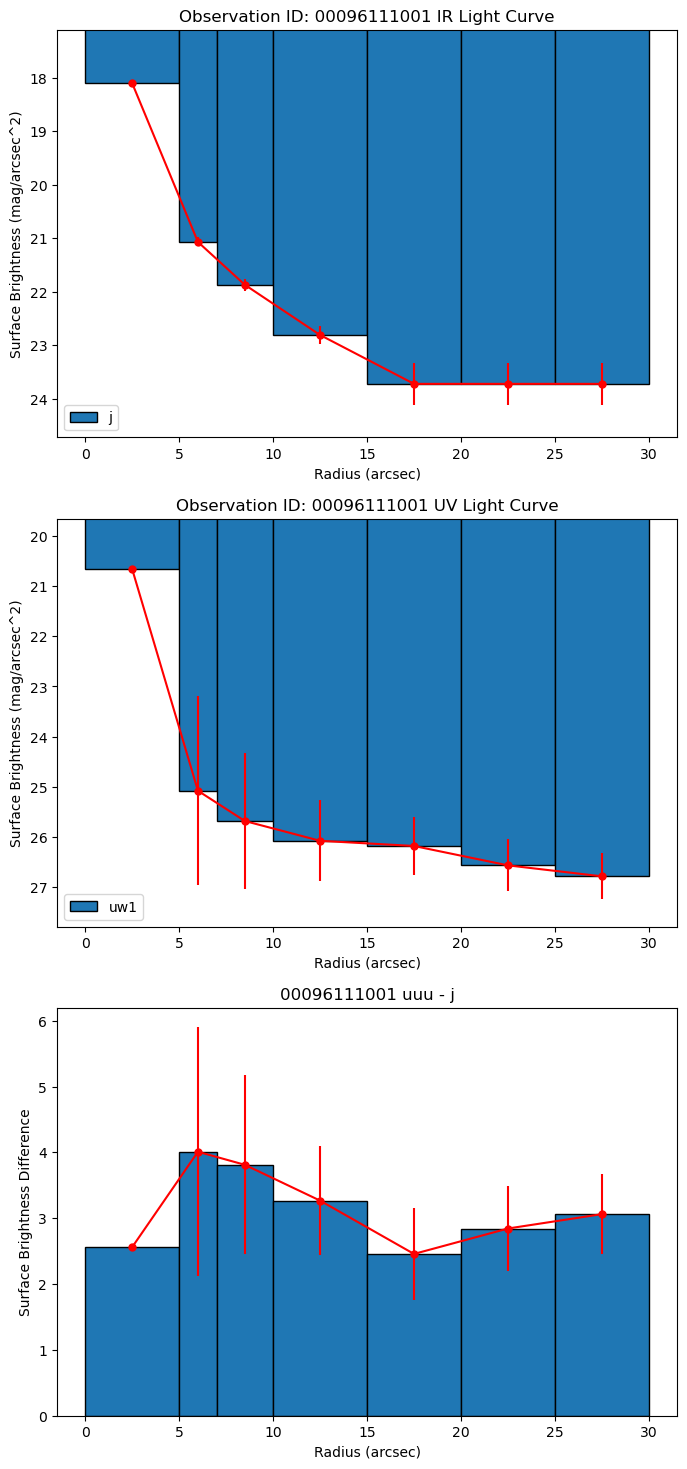

In [67]:
color('00096111001','j','uuu')

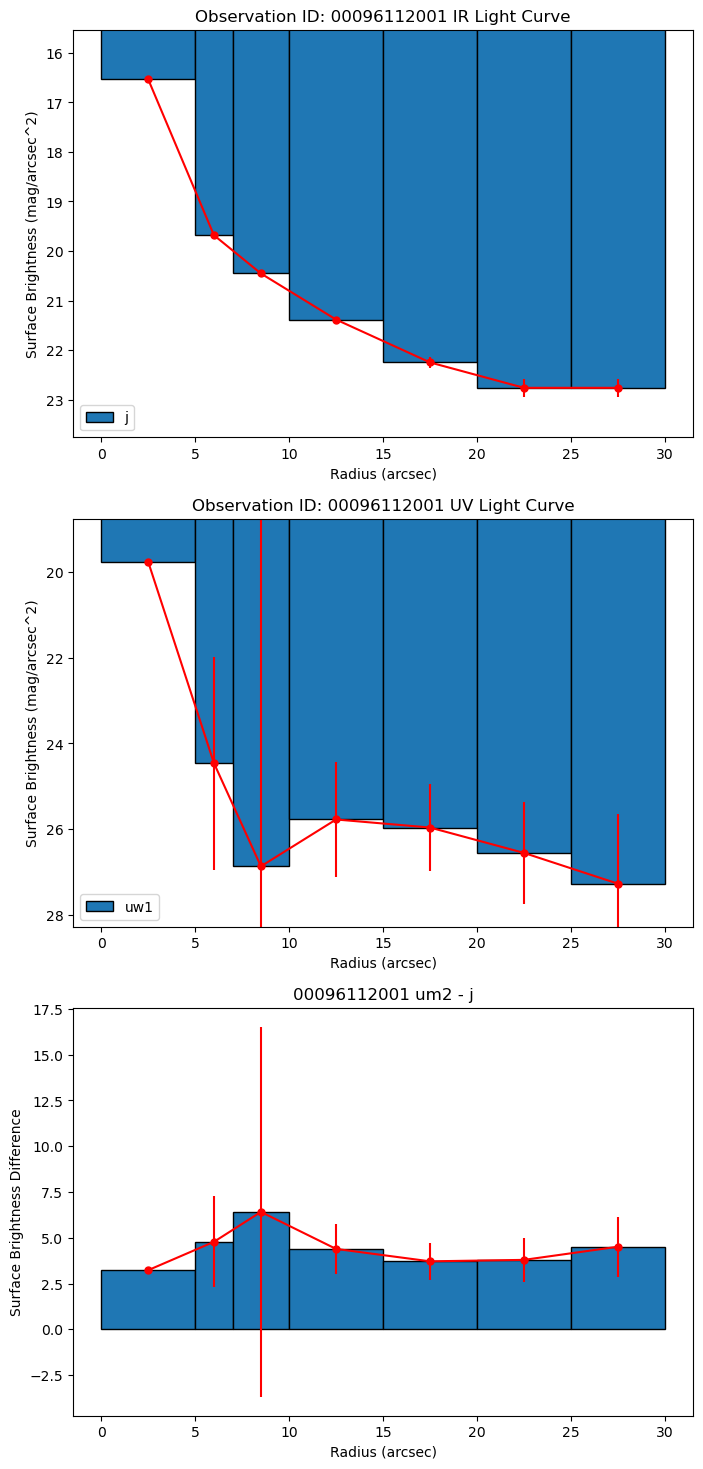

In [68]:
color('00096112001','j','um2')

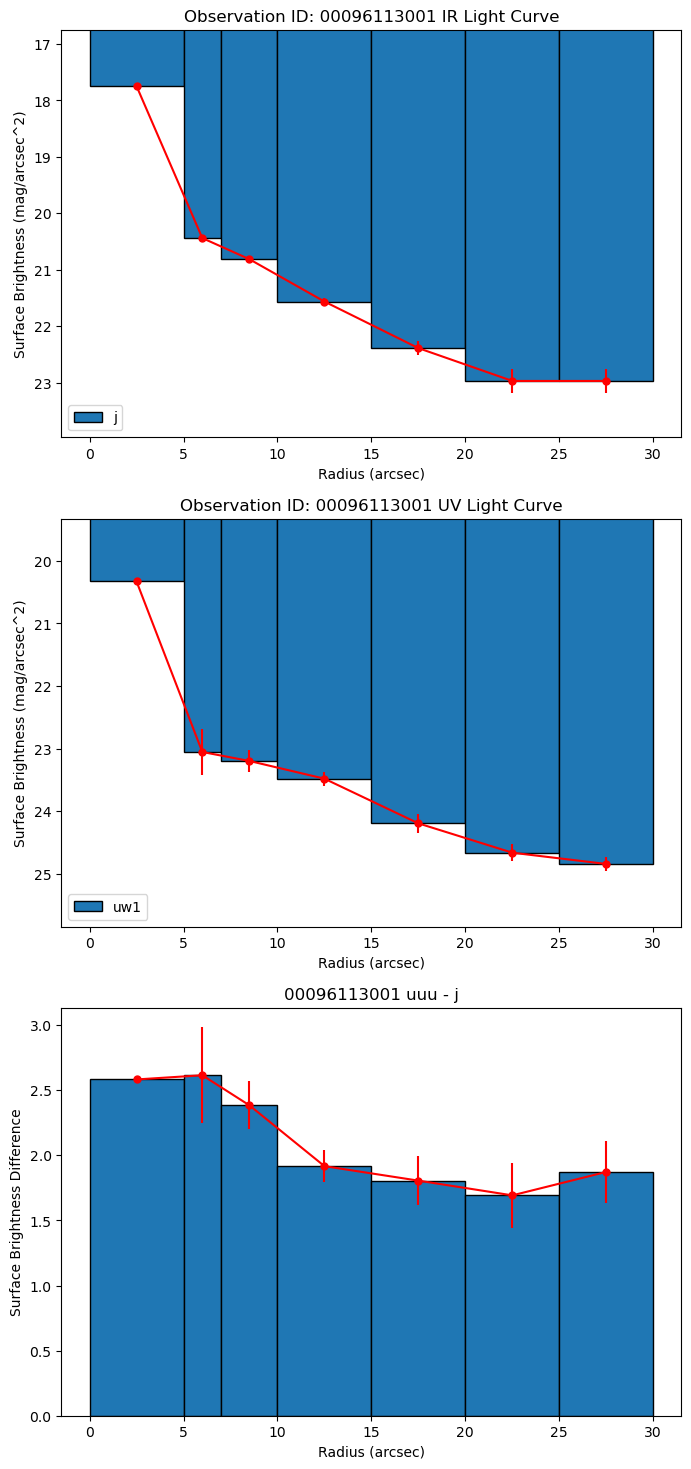

In [69]:
color('00096113001','j','uuu')

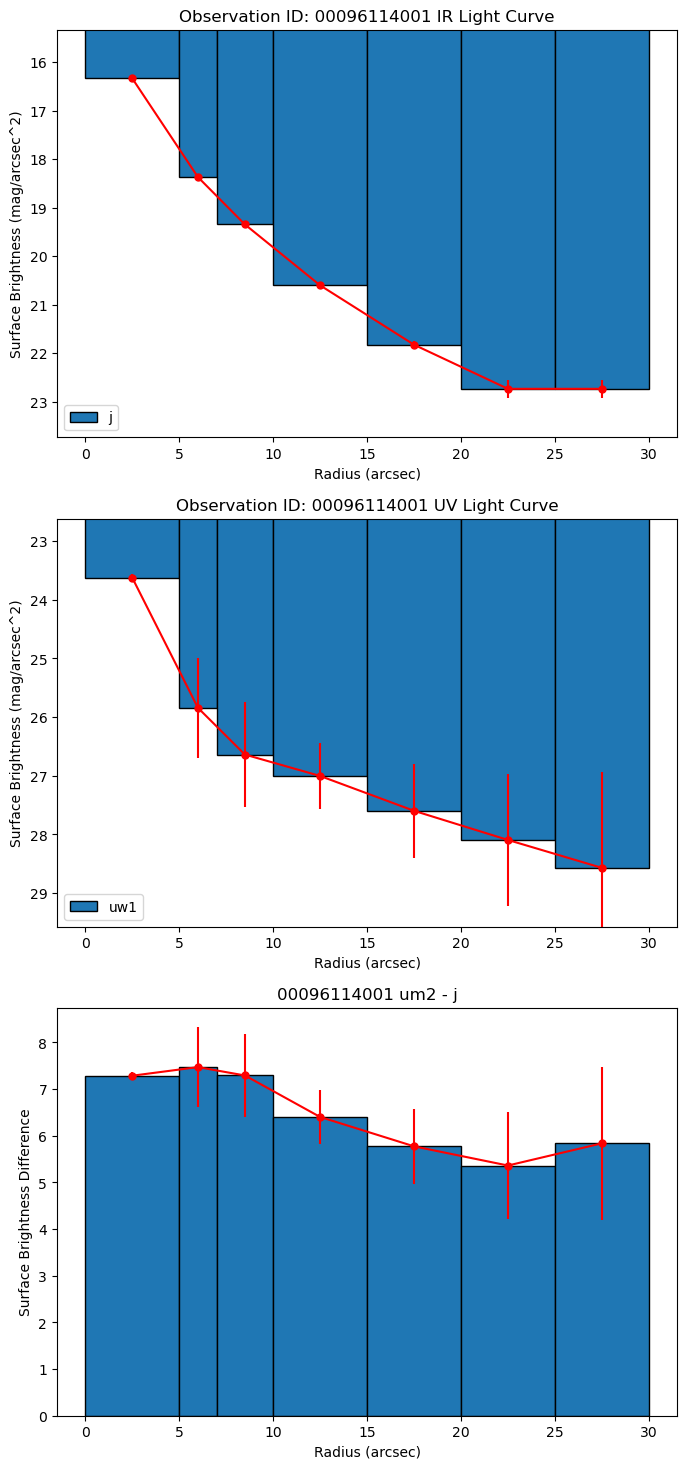

In [70]:
color('00096114001','j','um2')

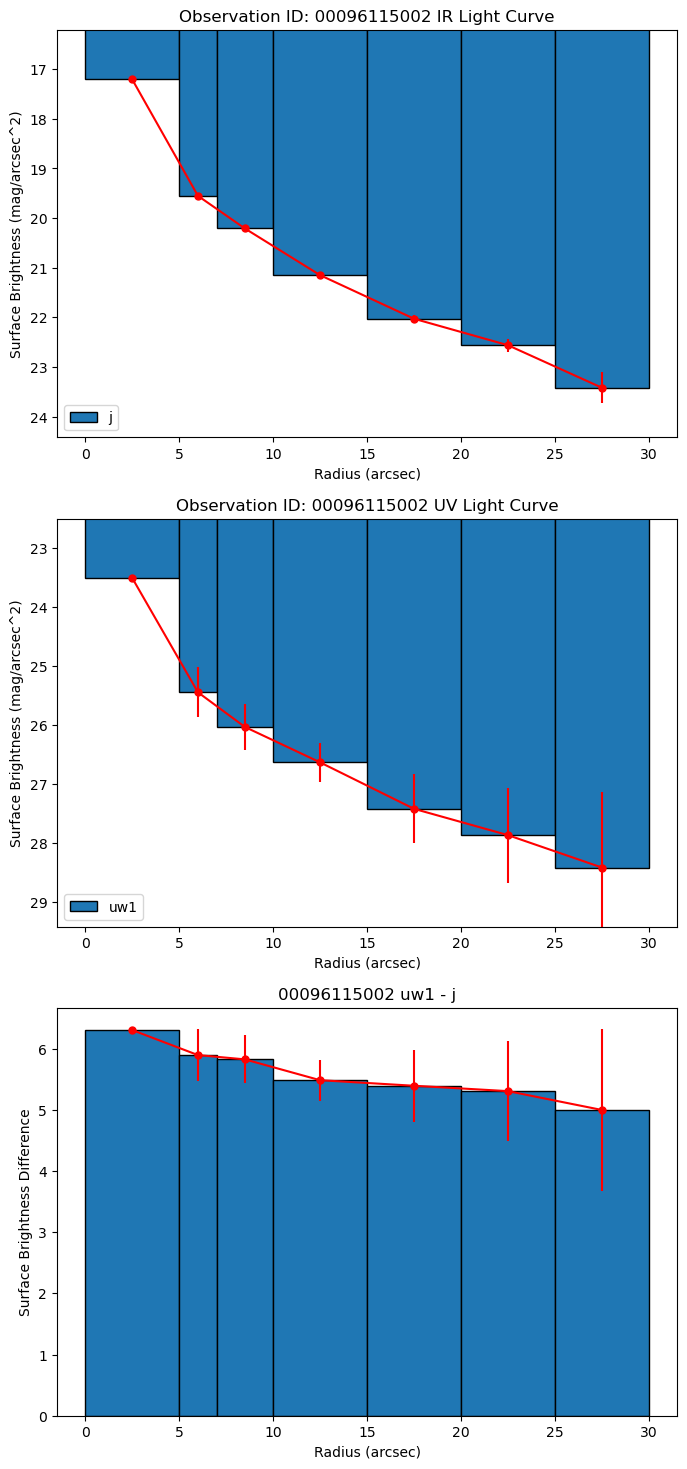

In [71]:
color('00096115002','j','uw1')

ValueError: 'yerr' must not contain negative values

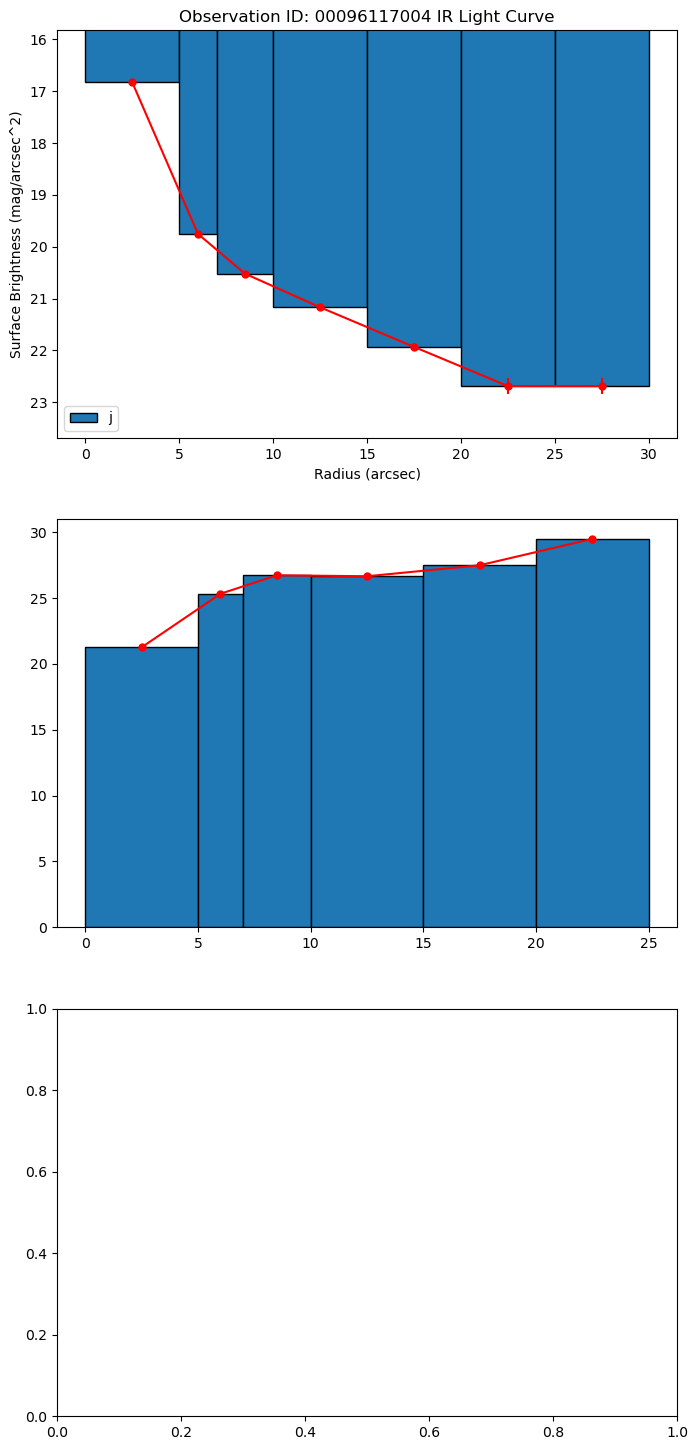

In [72]:
color('00096117004','j','um2')

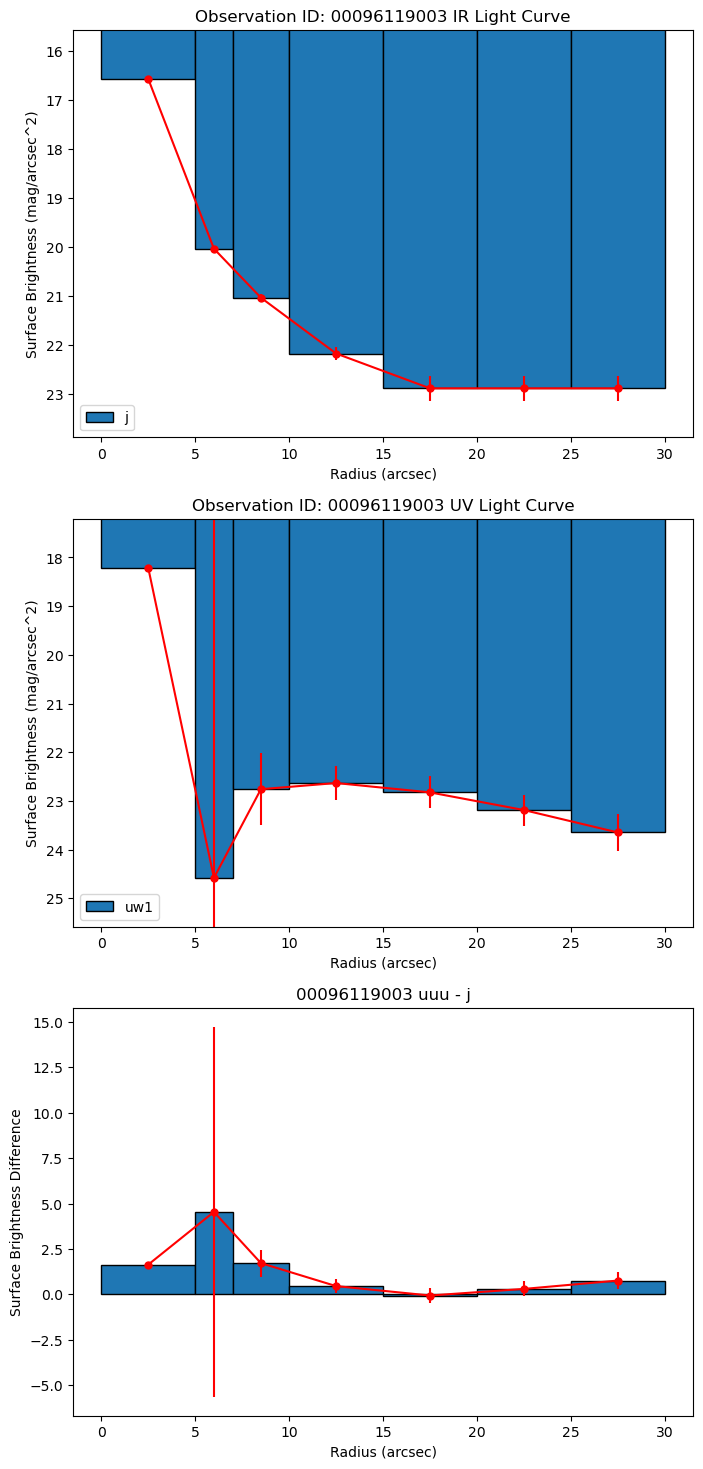

In [39]:
color('00096119003','j','uuu')

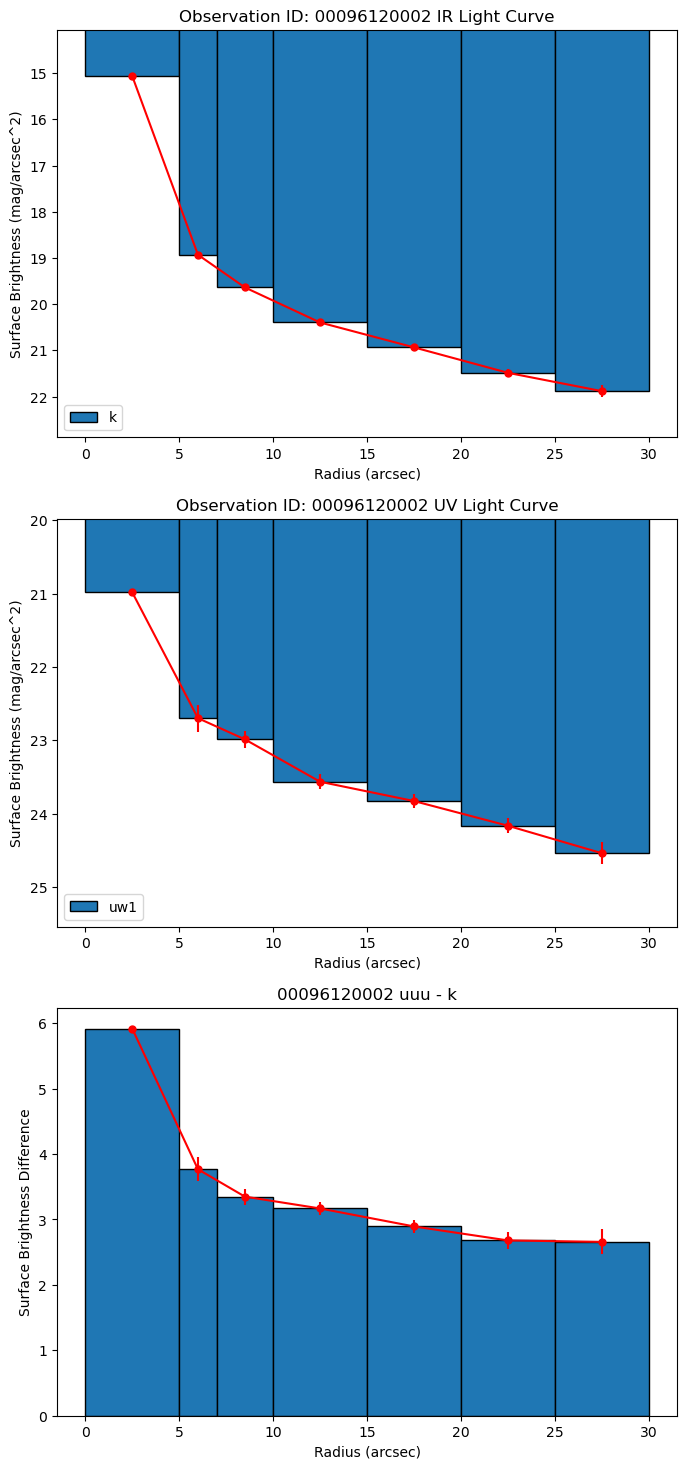

In [40]:
color('00096120002','k','uuu')

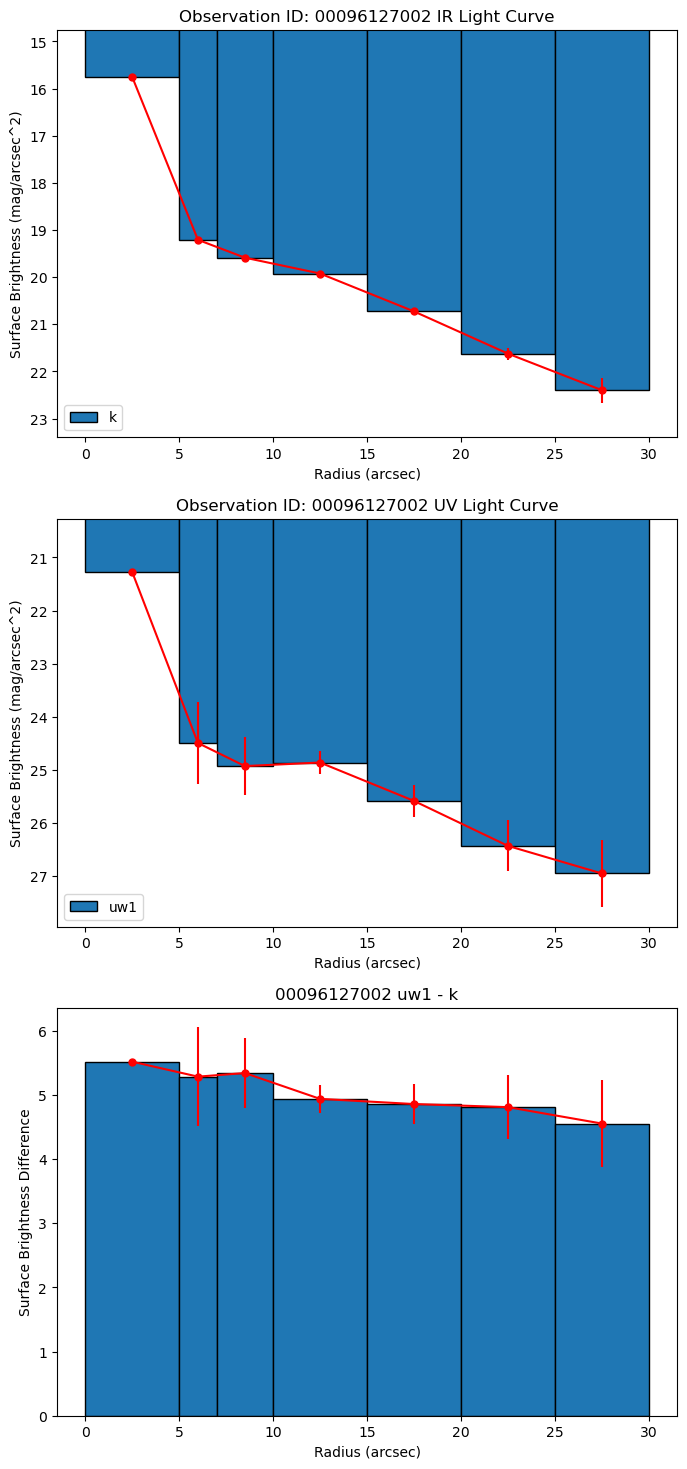

In [73]:
color('00096127002','k','uw1')

In [32]:
def color(obs_id, ir_filter, uv_filter):
    fig, axs = plt.subplots(3, 1, figsize=(8, 18))
    obs_id = obs_id
    ir_filter = ir_filter
    idx = int(int(obs_id) / 1000 - 96107)
    radiis = [5,7,10,15,20,25,30]
    bin_ranges = [0,5,7,10,15,20,25,30]
    radii_mid = [2.5,6,8.5,12.5,17.5,22.5,27.5]
    max_ap = 30
    r = 10
    imags = np.array([])
    ierrs = np.array([])
    imag1 = two_mass.iloc[idx][[f'{ir_filter}_m_5']].values[0]
    imags = np.append(imags, 10**((imag1+48.6)/-2.5)/(np.pi*5**2))
    ierrs = np.append(ierrs, 10**((imag1+48.6)/-2.5)*two_mass.iloc[idx][[f'{ir_filter}_msig_5']].values[0]/imag1)
    for i in range(len(radiis)):
        if i>5:
            break
        r1 = radiis[i]
        r2 = radiis[i+1]
        imag_r1 = two_mass.iloc[idx][[f'{ir_filter}_m_{r1}']].values[0]
        ierr_r1 = two_mass.iloc[idx][[f'{ir_filter}_msig_{r1}']].values[0]
        if ir_filter=='j':
            imag_r1+=0.89
        elif ir_filter=='h':
            imag_r1+=1.37
        else:
            imag_r1+=1.84
        imag_r2 = two_mass.iloc[idx][[f'{ir_filter}_m_{r2}']].values[0]
        ierr_r2 = two_mass.iloc[idx][[f'{ir_filter}_msig_{r2}']].values[0]
        if ir_filter=='j':
            imag_r2+=0.89
        elif ir_filter=='h':
            imag_r2+=1.37
        else:
            imag_r2+=1.84
        iflux1 = 10**((imag_r1+48.6)/-2.5)
        iflux2 = 10**((imag_r2+48.6)/-2.5)
        iflerr1 = iflux1*ierr_r1
        iflerr2 = iflux2*ierr_r2
        imag_ann = ((iflux2-iflux1)/(np.pi*(r2**2-r1**2)))
        imags = np.append(imags, imag_ann)
        ierrs = np.append(ierrs, np.sqrt((iflerr2**2/(np.pi*(r2**2-r1**2)))+(iflerr1**2/(np.pi*(r2**2-r1**2)))))
    last_valid_index = np.where(~np.isnan(imags))[0][-1]

    # Iterate through the array and replace NaN values with the last valid value
    for i in range(len(imags)):
        if np.isnan(imags[i]):
            imags[i] = imags[last_valid_index]
            ierrs[i] = ierrs[last_valid_index]
    axs[0].hist(bin_ranges[:-1], bin_ranges, weights=imags, edgecolor='k', label=f"{ir_filter}")
    axs[0].errorbar(radii_mid, imags, yerr=ierrs, color='red', linestyle='-', marker='o', markersize=5)
    axs[0].set_title(f"Observation ID: {obs_id} IR Profile (flux in ergs/s/cm^2/Hz)")
    axs[0].set_xlabel('Radius (arcsec)')
    axs[0].set_ylabel('Surface Brightness (flux/arcsec^2)')
    axs[0].set_yscale('log')
#     axs[0].set_ylim(min(imags),max(imags))
    axs[0].legend()
#     axs[0].invert_yaxis()
    radii = [5.000, 7.000, 10.000, 15.000, 20.000, 25.000, 30.000]
    filters = ['uw1', 'uw2', 'um2', 'uuu']
    max_ap = 20
    zp = 0

    ranges = ['0-5', '5-7', '7-10', '10-15', '15-20', '20-25', '25-30']

    if uv_filter == 'uw1':
        zp=18.95
    elif uv_filter == 'uuu':
        zp=19.36
    elif uv_filter == 'um2':
        zp=18.54
    mags = np.array([])
    mag_err = np.array([])
    filepath = f"{obs_id}/uvot/image/maghist_{uv_filter}_5.000_{obs_id}_noapcorr.fits"
    if os.path.exists(filepath):
        maghist = fits.open(filepath)
        mag_data = Table(maghist[1].data)
        mags = np.append(mags, mag_data['AB_FLUX_AA'].mean()/(np.pi*(5**2)))
#             mag_err = np.append(mag_err, mag_data['AB_MAG_ERR'].mean())
        mag_err = np.append(mag_err, mag_data['AB_FLUX_AA_ERR'].mean()/(np.pi*(5**2)))
    for i in range(len(radii)):
        if i>5:
            break
        radius1 = radii[i]
        radius2 = radii[i+1]
        if os.path.exists(f"{obs_id}/uvot/image/maghist_{uv_filter}_{str(radius1)}00_{obs_id}.fits"):
            maghist1 = fits.open(f"{obs_id}/uvot/image/maghist_{uv_filter}_{str(radius1)}00_{obs_id}.fits")
            mag_data1 = Table(maghist1[1].data)
#                 print(mag_data1['CORR_RATE'])
        if os.path.exists(f"{obs_id}/uvot/image/maghist_{uv_filter}_{str(radius2)}00_{obs_id}.fits"):
            maghist2 = fits.open(f"{obs_id}/uvot/image/maghist_{uv_filter}_{str(radius2)}00_{obs_id}.fits")
            mag_data2 = Table(maghist2[1].data)
#                 print(mag_data2['CORR_RATE'])
            ann_area = np.pi*(radius2**2-radius1**2)
            mags = np.append(mags, (mag_data2['AB_FLUX_AA'].mean()-mag_data1['AB_FLUX_AA'].mean())/ann_area)
#                 mag_err = np.append(mag_err, (mag_data2['AB_MAG_ERR'].mean()+mag_data1['AB_MAG_ERR'].mean()))
            mag_err = np.append(mag_err, np.sqrt((mag_data2['AB_FLUX_AA_ERR'].mean()/ann_area)**2+(mag_data1['AB_FLUX_AA_ERR'].mean()/ann_area)**2))
        else:
            continue
    if len(mags)==7 and mags[0]>=0:
        # Plot the magnitudes for the filter and observation ID in the respective subplot
#             mags = zp-2.5*np.log10(counts)
        axs[1].hist(bin_ranges[:-1], bin_ranges, weights=mags, edgecolor='k', label=f"{uv_filter}")
        axs[1].errorbar(radii_mid, mags, yerr=mag_err, color='red', linestyle='-', marker='o', markersize=5)
        axs[1].set_title(f"Observation ID: {obs_id} UV Profile (flux in ergs/s/cm^2/Angstrom)")
        axs[1].set_xlabel('Radius (arcsec)')
        axs[1].set_ylabel('Surface Brightness (flux/arcsec^2)')
        axs[1].set_yscale('log')
#         axs[1].set_ylim(min(mags),max(mags))
#         axs[1].invert_yaxis()

        # Add a legend to each subplot
    axs[1].legend()

    # Adjust the spacing between subplots
    
#     axs[2].hist(bin_ranges[:-1], bin_ranges, weights=mags-imags, edgecolor='k', label=f"{filterr}")
#     axs[2].errorbar(radii_mid, mags-imags, yerr=np.sqrt(mag_err**2+ierrs**2), color='red', linestyle='-', marker='o', markersize=5)
#     axs[2].set_ylabel(f"Surface Brightness Difference")
#     axs[2].set_xlabel("Radius (arcsec)")
#     axs[2].set_title(f"{obs_id} {uv_filter} - {ir_filter}")
    fig.tight_layout();

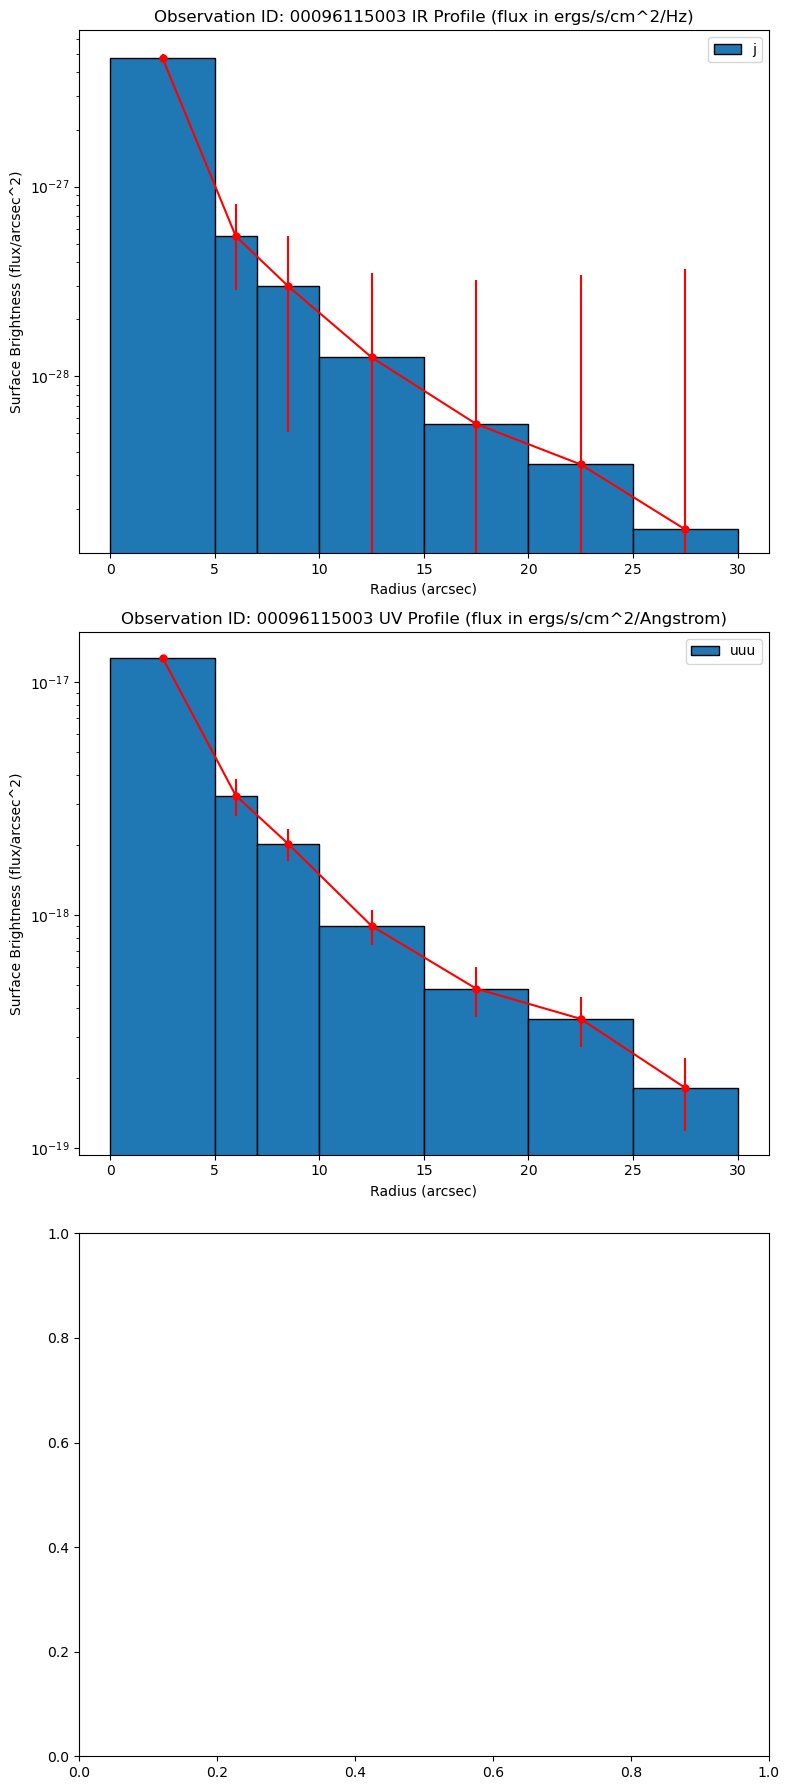

In [33]:
color('00096115003','j','uuu')

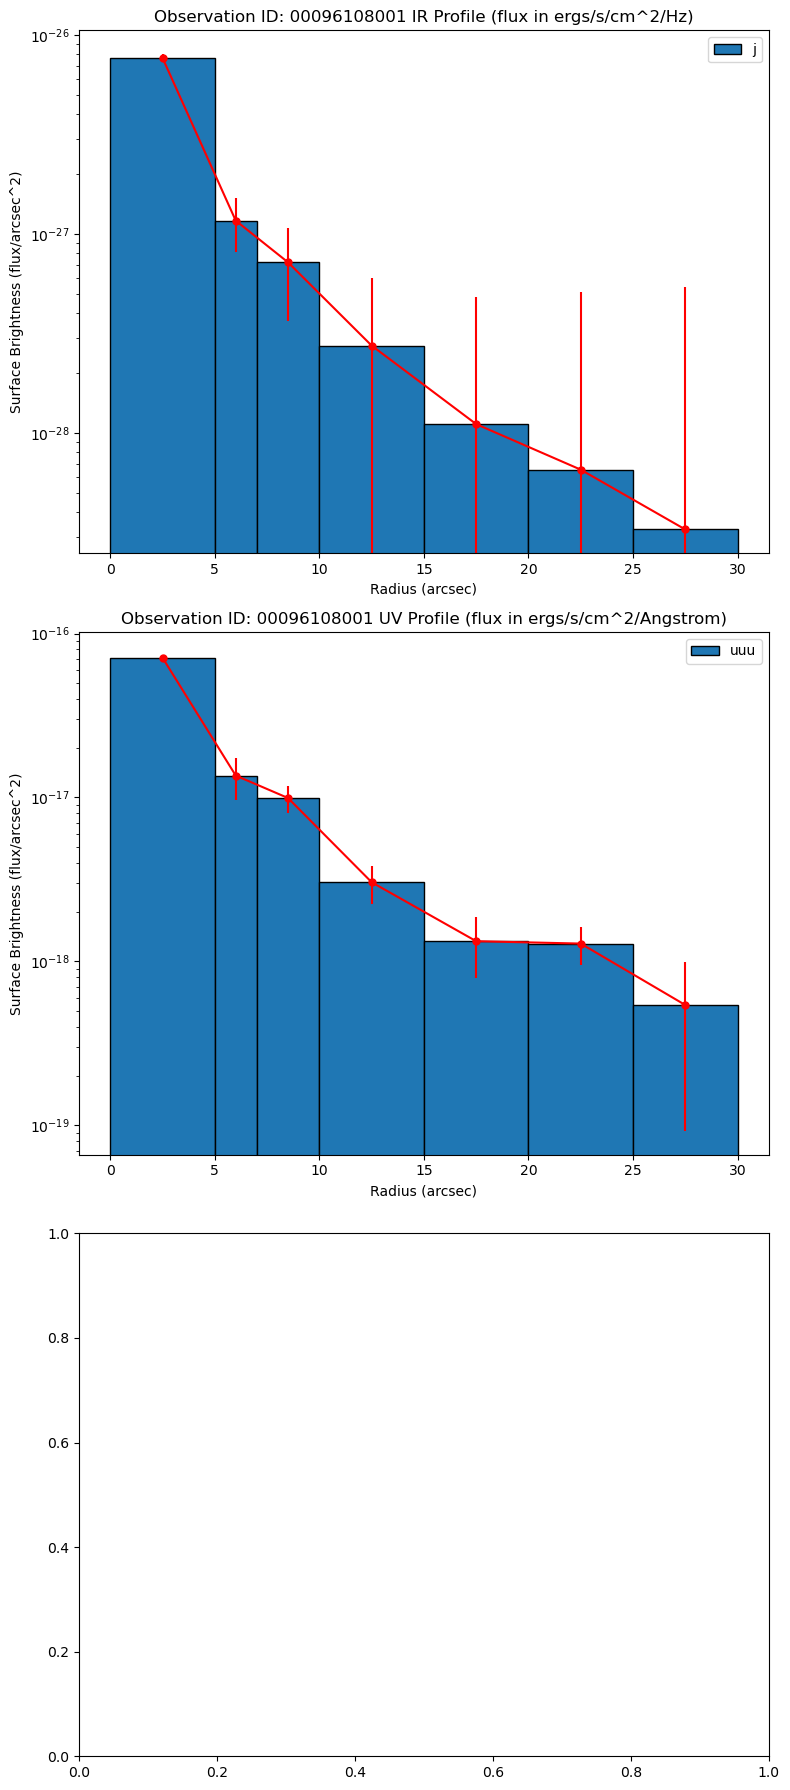

In [34]:
color('00096108001','j','uuu')

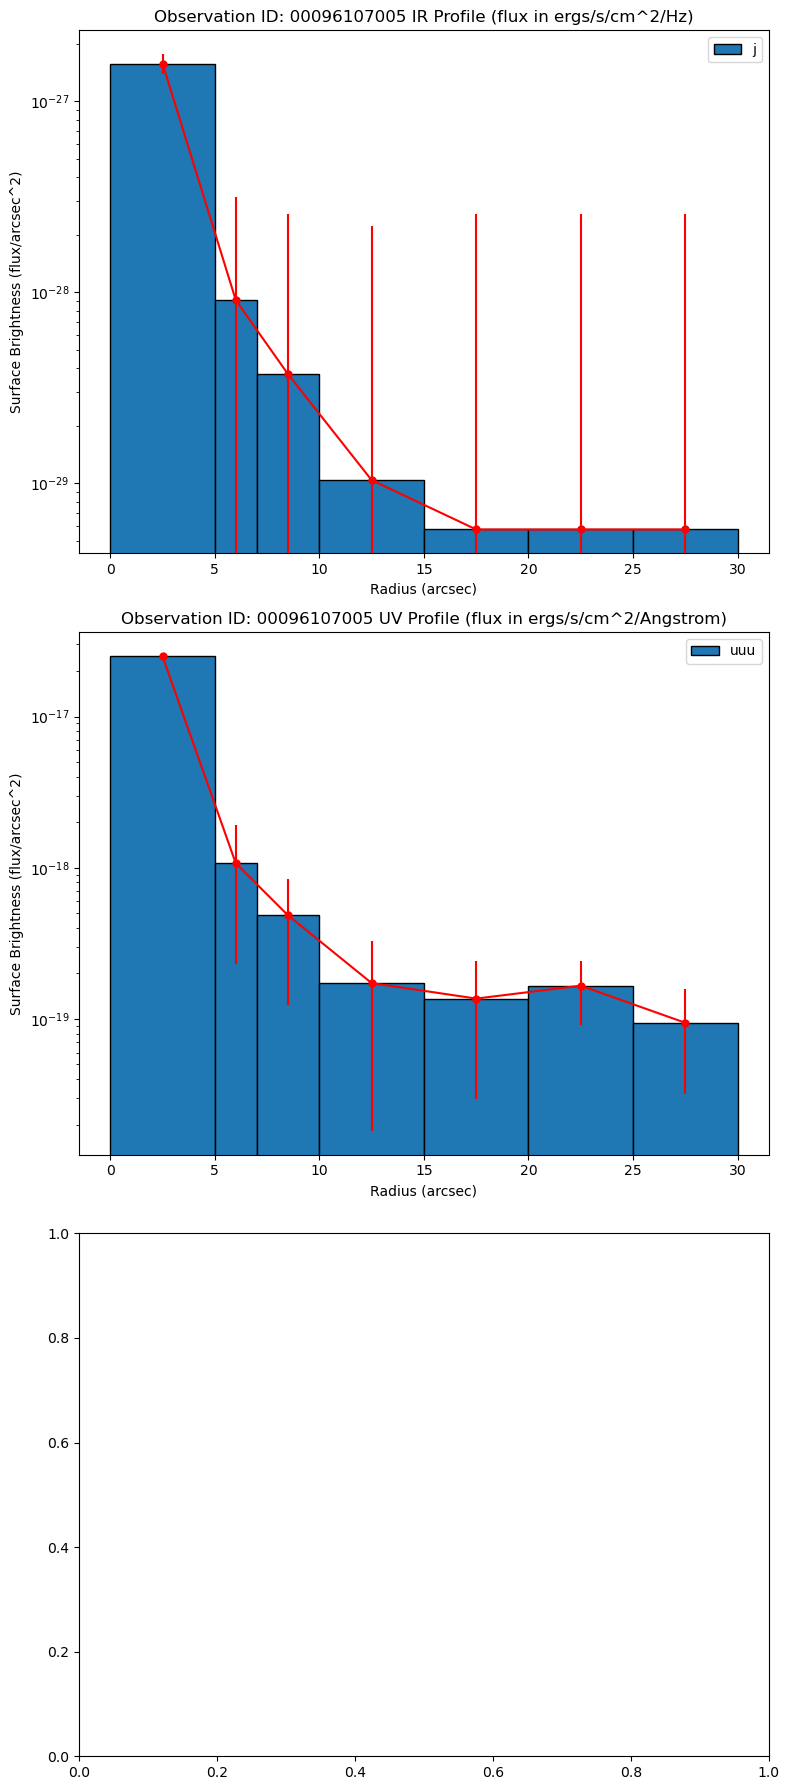

In [35]:
color('00096107005','j','uuu')

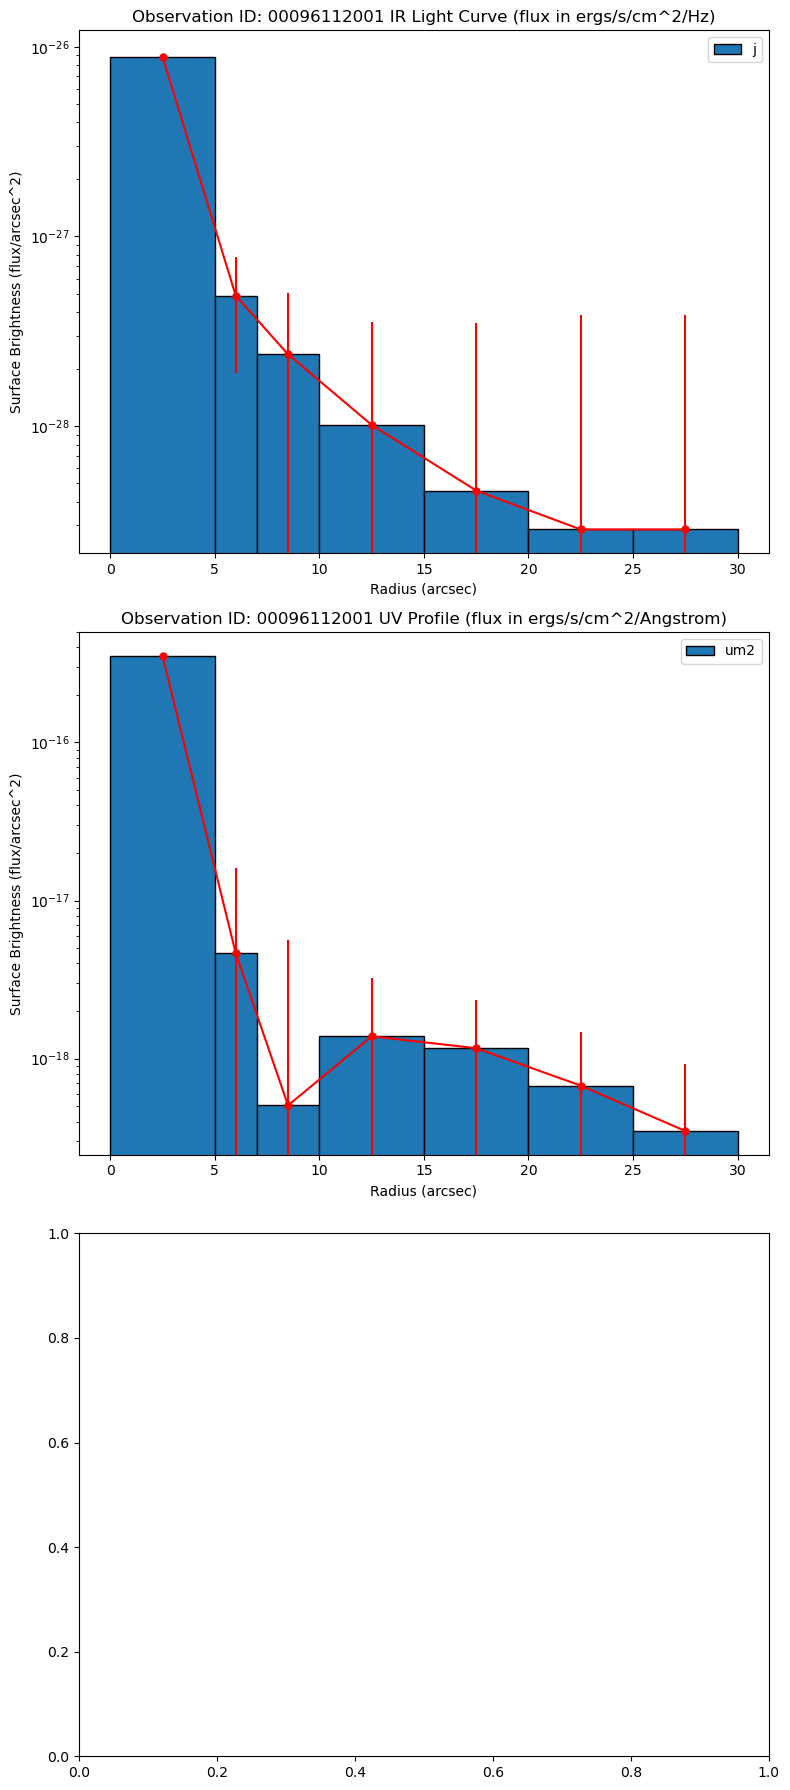

In [31]:
color('00096112001','j','um2')

In [29]:
mag_data['AB_FLUX_AA'].mean()

6.935593e-16

In [3]:
obs_id = '00096115003'
ir_filter='j'
idx = int(int(obs_id) / 1000 - 96107)
radiis = [5,7,10,15,20,25,30]
max_ap = 30
r = 10
imags = np.array([])
ierrs = np.array([])
imag1 = two_mass.iloc[idx][[f'{ir_filter}_m_5']].values[0]
imags = np.append(imags, 10**((imag1+48.6)/-2.5)/(np.pi*5**2))
ierrs = np.append(ierrs, 10**((imag1+48.6)/-2.5)*two_mass.iloc[idx][[f'{ir_filter}_msig_5']].values[0]/imag1)
for i in range(len(radiis)):
    if i>5:
        break
    r1 = radiis[i]
    r2 = radiis[i+1]
    imag_r1 = two_mass.iloc[idx][[f'{ir_filter}_m_{r1}']].values[0]
    ierr_r1 = two_mass.iloc[idx][[f'{ir_filter}_msig_{r1}']].values[0]
    if ir_filter=='j':
        imag_r1+=0.89
    elif ir_filter=='h':
        imag_r1+=1.37
    else:
        imag_r1+=1.84
    imag_r2 = two_mass.iloc[idx][[f'{ir_filter}_m_{r2}']].values[0]
    ierr_r2 = two_mass.iloc[idx][[f'{ir_filter}_msig_{r2}']].values[0]
    if ir_filter=='j':
        imag_r2+=0.89
    elif ir_filter=='h':
        imag_r2+=1.37
    else:
        imag_r2+=1.84
    iflux1 = 10**((imag_r1+48.6)/-2.5)
    iflux2 = 10**((imag_r2+48.6)/-2.5)
    iflerr1 = iflux1*ierr_r1
    iflerr2 = iflux2*ierr_r2
    imag_ann = ((iflux2-iflux1)/(np.pi*(r2**2-r1**2)))
    imags = np.append(imags, imag_ann)
    ierrs = np.append(ierrs, np.sqrt((iflerr2**2/(np.pi*(r2**2-r1**2)))+(iflerr1**2/(np.pi*(r2**2-r1**2)))))
plt.hist(bin_ranges[:-1], bin_ranges, weights=imags, edgecolor='k', label=f"{ir_filter}")
plt.errorbar(radii_mid, imags, yerr=ierrs, color='red', linestyle='-', marker='o', markersize=5)
plt.title(f"Observation ID: {obs_id} IR Light Curve")
plt.xlabel('Radius (arcsec)')
plt.ylabel('Surface Brightness (mag/arcsec^2)')
# plt.ylim(min(imags),max(imags))
plt.legend()
# plt.invert_yaxis()

NameError: name 'two_mass' is not defined

[12.468 13.115 12.888 12.695 12.59  12.514 12.474]


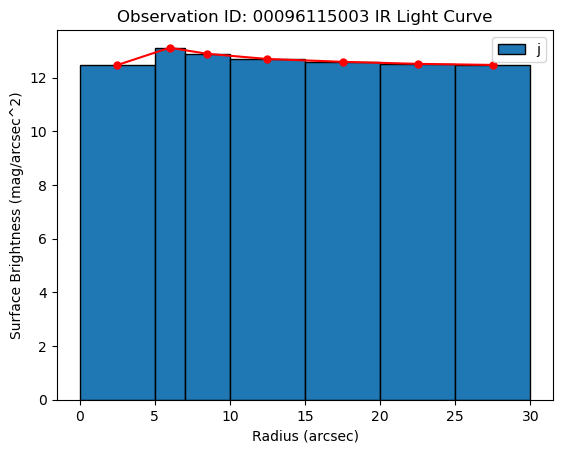

In [31]:
obs_id = '00096115003'
ir_filter='j'
idx = int(int(obs_id) / 1000 - 96107)
radiis = [5,7,10,15,20,25,30]
max_ap = 30
r = 10
imags = np.array([])
ierrs = np.array([])
imag1 = two_mass.iloc[idx][[f'{ir_filter}_m_5']].values[0]
imags = np.append(imags, imag1)
ierrs = np.append(ierrs, 10**((imag1+48.6)/-2.5)*two_mass.iloc[idx][[f'{ir_filter}_msig_5']].values[0]/imag1)
for i in range(len(radiis)):
    if i>5:
        break
    r1 = radiis[i]
    r2 = radiis[i+1]
    imag_r1 = two_mass.iloc[idx][[f'{ir_filter}_m_{r1}']].values[0]
    ierr_r1 = two_mass.iloc[idx][[f'{ir_filter}_msig_{r1}']].values[0]
    if ir_filter=='j':
        imag_r1+=0.89
    elif ir_filter=='h':
        imag_r1+=1.37
    else:
        imag_r1+=1.84
    imag_r2 = two_mass.iloc[idx][[f'{ir_filter}_m_{r2}']].values[0]
    ierr_r2 = two_mass.iloc[idx][[f'{ir_filter}_msig_{r2}']].values[0]
    if ir_filter=='j':
        imag_r2+=0.89
    elif ir_filter=='h':
        imag_r2+=1.37
    else:
        imag_r2+=1.84
    iflux1 = 10**((imag_r1+48.6)/-2.5)
    iflux2 = 10**((imag_r2+48.6)/-2.5)
    iflerr1 = iflux1*ierr_r1
    iflerr2 = iflux2*ierr_r2
    imag_ann = ((iflux2-iflux1)/(np.pi*(r2**2-r1**2)))
    imags = np.append(imags, imag_r2)
    ierrs = np.append(ierrs, np.sqrt((iflerr2**2/(np.pi*(r2**2-r1**2)))+(iflerr1**2/(np.pi*(r2**2-r1**2)))))
plt.hist(bin_ranges[:-1], bin_ranges, weights=imags, edgecolor='k', label=f"{ir_filter}")
plt.errorbar(radii_mid, imags, yerr=ierrs, color='red', linestyle='-', marker='o', markersize=5)
plt.title(f"Observation ID: {obs_id} IR Light Curve")
plt.xlabel('Radius (arcsec)')
plt.ylabel('Surface Brightness (mag/arcsec^2)')
# plt.ylim(min(imags),max(imags))
plt.legend()
# plt.invert_yaxis()
print(imags)

In [32]:
print(iflux1, iflux2, iflerr1, iflerr2)

np.sqrt((iflerr1**2+iflerr2**2)/(3.14*(30**2-25**2)))
print(ierrs)

3.5842640804371243e-25 3.7187758332493507e-25 6.451675344786823e-27 8.181306833148571e-27
[2.39934773e-28 2.62017804e-28 2.48449708e-28 2.24005701e-28
 2.64229055e-28 3.07305935e-28 3.54478114e-28]


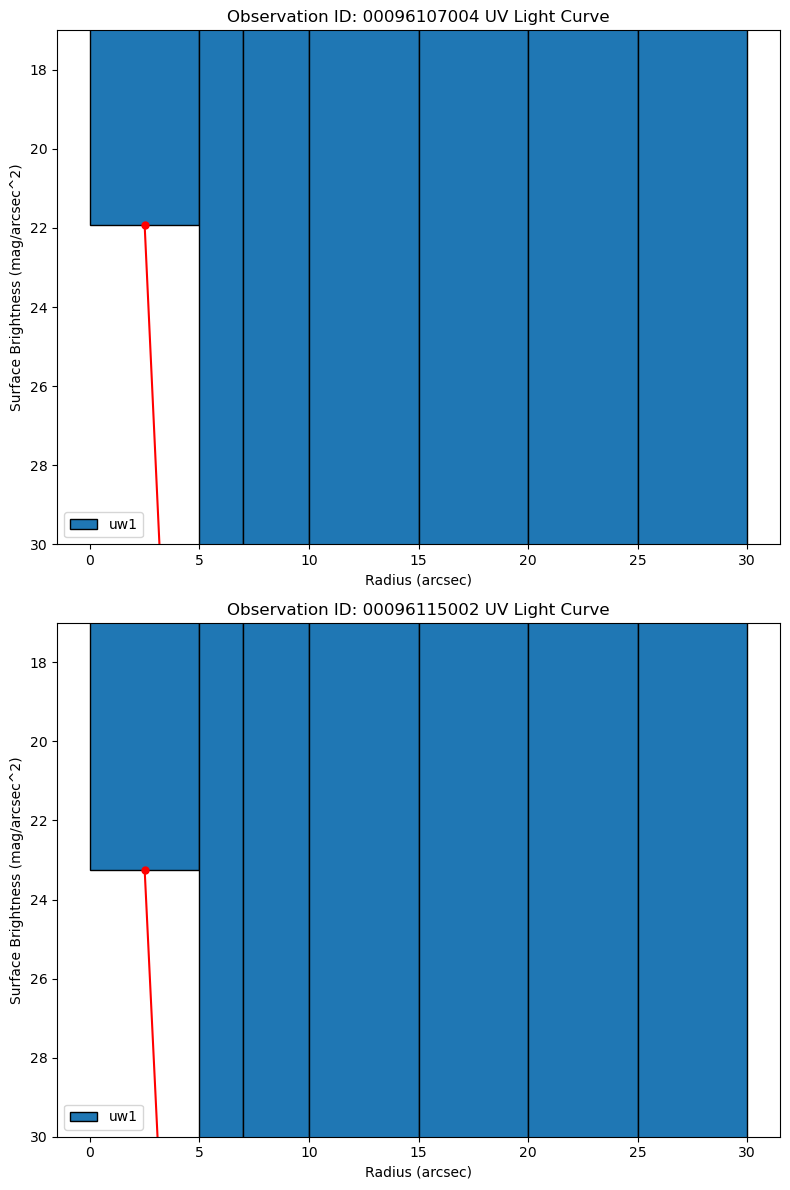

<Table length=4>
      MET         EXTNAME         TSTART     ... QUALFLAG PHOTFLAG CORRFLAG
    float64        str12         float64     ...  int32    int32    int32  
--------------- ------------ --------------- ... -------- -------- --------
645016110.48891 w1645015900I   645015900.036 ...     -999        2        0
 645050125.5057 w1645049850I 645049850.15716 ...     -999        2        0
645055834.78165 w1645055268I  645055268.5447 ...     -999        2        0
645061961.26184 w1645061521I 645061521.50628 ...     -999        2        0

In [33]:
radii = [5.000, 7.000, 10.000, 15.000, 20.000, 25.000, 30.000]
filters = ['uw1', 'uw2', 'um2', 'uuu']
obs_ids = ['00096107004','00096115002']
max_ap = 20
zp = 0

if uv_filter == 'uw1':
    zp=18.95
elif uv_filter == 'uuu':
    zp=19.36
elif uv_filter == 'um2':
    zp=18.54

num_plots = 2

# Set up the subplots
fig, axs = plt.subplots(num_plots, 1, figsize=(8, 6*num_plots))

ranges = ['0-5', '5-7', '7-10', '10-15', '15-20', '20-25', '25-30']
bin_ranges = [0,5,7,10,15,20,25,30]
radii_mid = [2.5,6,8.5,12.5,17.5,22.5,27.5]

for j, obs_id in enumerate(obs_ids):
    for filterr in filters:
        if filterr == 'uw2':
            continue
        if filterr == 'uw1':
            zp=18.95
        elif filterr == 'uuu':
            zp=19.36
        elif filterr == 'um2':
            zp=18.54
        mags = np.array([])
        mag_err = np.array([])
        filepath = f"{obs_id}/uvot/image/maghist_{filterr}_5.000_{obs_id}_noapcorr.fits"
        if os.path.exists(filepath):
            maghist = fits.open(filepath)
            mag_data = Table(maghist[1].data)
            mags = np.append(mags, zp-2.5*np.log10(mag_data['CORR_RATE'].mean())+2.5*np.log10(np.pi*5**2))
#             mag_err = np.append(mag_err, mag_data['AB_MAG_ERR'].mean())
            mag_err = np.append(mag_err, mag_data['CORR_RATE_ERR'].mean()/mag_data['CORR_RATE'].mean())
        for i in range(len(radii)):
            if i>5:
                break
            radius1 = radii[i]
            radius2 = radii[i+1]
            if os.path.exists(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius1)}00_{obs_id}.fits"):
                maghist1 = fits.open(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius1)}00_{obs_id}.fits")
                mag_data1 = Table(maghist1[1].data)
    #                 print(mag_data1['CORR_RATE'])
            if os.path.exists(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius2)}00_{obs_id}.fits"):
                maghist2 = fits.open(f"{obs_id}/uvot/image/maghist_{filterr}_{str(radius2)}00_{obs_id}.fits")
                mag_data2 = Table(maghist2[1].data)
    #                 print(mag_data2['CORR_RATE'])
                ann_area = np.pi*(radius2**2-radius1**2)
                mags = np.append(mags, zp-2.5*np.log10((mag_data2['AB_FLUX_AA'].mean()-mag_data1['AB_FLUX_AA'].mean()))+2.5*np.log10(ann_area))
#                 mag_err = np.append(mag_err, (mag_data2['AB_MAG_ERR'].mean()+mag_data1['AB_MAG_ERR'].mean()))
                mag_err = np.append(mag_err, np.sqrt(mag_data2['AB_FLUX_AA_ERR'].mean()**2+mag_data1['AB_FLUX_AA_ERR'].mean()**2)/ann_area)
            else:
                continue
        if len(mags)==7 and mags[0]>=0:
            # Plot the magnitudes for the filter and observation ID in the respective subplot
#             mags = zp-2.5*np.log10(counts)
            axs[j].hist(bin_ranges[:-1], bin_ranges, weights=mags, edgecolor='k', label=f"{filterr}")
            axs[j].errorbar(radii_mid, mags, yerr=mag_err, color='red', linestyle='-', marker='o', markersize=5)
            axs[j].set_title(f"Observation ID: {obs_id} UV Light Curve")
            axs[j].set_xlabel('Radius (arcsec)')
            axs[j].set_ylabel('Surface Brightness (mag/arcsec^2)')
            axs[j].set_ylim(17,30)
            axs[j].invert_yaxis()
#             axs[j].set_yscale('log')
    #             print(counts)
            break
    
    # Add a legend to each subplot
    axs[j].legend()

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()
mag_data2